In [ ]:
#do some basic EDA
#learn about avg headways, predicted vs arrival time
#add in schedule data and compare
#figure out final output -- avg delay for each line at each station? regression to predict delay?
#put EDA in A1

In [ ]:
#final output should
#allow selection of line
#tell you next scheduled arrival
#tell you next actual arrival
#tell you how often that next train is run
#tell you avg delay of that next train

In [ ]:
#need to end up with
#line
#run num
#day of week
#hour
#scheduled frequency
#historical frequency

In [ ]:
#TODO NEXT
#pull out hour into separate column from gtfs_comb
#gtfs_comb['arrival_time'] = pd.to_datetime(gtfs_comb['arrival_time'],format= '%HH:%MM:%SS')


# Arrivals Data

# Setup

### Libraries

In [2]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

### Load Data

In [3]:
#load arrivals data from local csv
#last updated 04/22/23 1:22pm
df = pd.read_csv("train_arrivals-May2023.csv")

In [4]:
#check dataframe
df

Station_ID  Stop_ID     Station_Name    Destination Route  Run_Number  \
0           40330    30065            Grand  95th/Dan Ryan   Red         809   
1           40330    30065            Grand  95th/Dan Ryan   Red         809   
2           40330    30065            Grand  95th/Dan Ryan   Red         809   
3           41360    30265       California   Ashland/63rd     G           2   
4           40840    30164  South Boulevard           Loop     P         506   
...           ...      ...              ...            ...   ...         ...   
35466       41360    30265       California   Ashland/63rd     G          15   
35467       41440    30278          Addison           Loop   Brn         425   
35468       41020    30197     Logan Square         O'Hare  Blue         222   
35469       41360    30265       California   Ashland/63rd     G          15   
35470       41440    30278          Addison           Loop   Brn         425   

           Prediction_Time         Arrival_Time  Is_Approaching  Is_Scheduled  \
0      2023-04-21T10:25:05  2023-04-21T10:26:05               1             0   
1      2023-04-21T10:25:57  2023-04-21T10:26:57               1             0   
2      2023-04-21T10:25:57  2023-04-21T10:26:57               1             0   
3      2023-04-21T10:26:34  2023-04-21T10:27:34               1             0   
4      2023-04-21T10:26:26  2023-04-21T10:27:26               1             0   
...                    ...                  ...             ...           ...   
35466  2023-05-10T18:15:46  2023-05-10T18:16:46               1             0   
35467  2023-05-10T18:15:59  2023-05-10T18:16:59               1             0   
35468  2023-05-10T18:16:39  2023-05-10T18:17:39               1             0   
35469  2023-05-10T18:15:46  2023-05-10T18:16:46               1             0   
35470  2023-05-10T18:15:59  2023-05-10T18:16:59               1             0   

       Is_Delayed  Is_Fault  
0               0         0  
1               0         0  
2               0         0  
3               0         0  
4               0         0  
...           ...       ...  
35466           0         0  
35467           0         0  
35468           0         0  
35469           0         0  
35470           0     40330  

[35471 rows x 12 columns]

# Data Cleanup

### Arrival Times

In [5]:
#We're using a subset of the data here. 1409 train arrival datapoints and 12 features.
df.shape

(35471, 12)

In [6]:
#Check for duplicate rows
df.duplicated().sum()

5892

In [7]:
#Looks like we have some duplicates. Let's view them.
df[df.duplicated()]

Station_ID  Stop_ID Station_Name    Destination Route  Run_Number  \
2           40330    30065        Grand  95th/Dan Ryan   Red         809   
8           41360    30265   California   Ashland/63rd     G           2   
13          41360    30266   California    Harlem/Lake     G         607   
18          40330    30064        Grand         Howard   Red         906   
20          40330    30064        Grand         Howard   Red         906   
...           ...      ...          ...            ...   ...         ...   
35438       41360    30266   California    Harlem/Lake     G         617   
35453       40330    30065        Grand  95th/Dan Ryan   Red         817   
35457       41360    30266   California    Harlem/Lake     G          17   
35462       41360    30266   California    Harlem/Lake     G          17   
35469       41360    30265   California   Ashland/63rd     G          15   

           Prediction_Time         Arrival_Time  Is_Approaching  Is_Scheduled  \
2      2023-04-21T10:25:57  2023-04-21T10:26:57               1             0   
8      2023-04-21T10:27:35  2023-04-21T10:28:35               1             0   
13     2023-04-21T10:28:44  2023-04-21T10:29:44               1             0   
18     2023-04-21T10:30:59  2023-04-21T10:31:59               1             0   
20     2023-04-21T10:30:59  2023-04-21T10:31:59               1             0   
...                    ...                  ...             ...           ...   
35438  2023-05-10T18:03:33  2023-05-10T18:04:33               1             0   
35453  2023-05-10T18:09:04  2023-05-10T18:10:04               1             0   
35457  2023-05-10T18:13:57  2023-05-10T18:14:57               1             0   
35462  2023-05-10T18:14:29  2023-05-10T18:15:29               1             0   
35469  2023-05-10T18:15:46  2023-05-10T18:16:46               1             0   

       Is_Delayed  Is_Fault  
2               0         0  
8               0         0  
13              0         0  
18              0         0  
20              0         0  
...           ...       ...  
35438           0         0  
35453           0         0  
35457           0         0  
35462           0         0  
35469           0         0  

[5892 rows x 12 columns]

In [8]:
#Let's get rid of them
df_clean = df.drop_duplicates()
df_clean.shape #and check

(29579, 12)

In [9]:
#Check for nulls
df_clean.isna().sum()

Station_ID         0
Stop_ID            0
Station_Name       0
Destination        0
Route              2
Run_Number         0
Prediction_Time    0
Arrival_Time       0
Is_Approaching     0
Is_Scheduled       0
Is_Delayed         0
Is_Fault           0
dtype: int64

In [10]:
#Since NAs are minimal, let's just drop those rows
df_clean = df_clean.dropna(subset=['Route'])

In [11]:
df_clean.isna().sum() #and check again

Station_ID         0
Stop_ID            0
Station_Name       0
Destination        0
Route              0
Run_Number         0
Prediction_Time    0
Arrival_Time       0
Is_Approaching     0
Is_Scheduled       0
Is_Delayed         0
Is_Fault           0
dtype: int64

In [12]:
#check column datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29577 entries, 0 to 35470
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Station_ID       29577 non-null  int64 
 1   Stop_ID          29577 non-null  int64 
 2   Station_Name     29577 non-null  object
 3   Destination      29577 non-null  object
 4   Route            29577 non-null  object
 5   Run_Number       29577 non-null  int64 
 6   Prediction_Time  29577 non-null  object
 7   Arrival_Time     29577 non-null  object
 8   Is_Approaching   29577 non-null  int64 
 9   Is_Scheduled     29577 non-null  int64 
 10  Is_Delayed       29577 non-null  int64 
 11  Is_Fault         29577 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 2.9+ MB


In [13]:
#change prediction and arrival times from object to datetime datatype
df_clean["Prediction_Time"] = pd.to_datetime(df_clean["Prediction_Time"])
df_clean["Arrival_Time"] = pd.to_datetime(df_clean["Arrival_Time"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29577 entries, 0 to 35470
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station_ID       29577 non-null  int64         
 1   Stop_ID          29577 non-null  int64         
 2   Station_Name     29577 non-null  object        
 3   Destination      29577 non-null  object        
 4   Route            29577 non-null  object        
 5   Run_Number       29577 non-null  int64         
 6   Prediction_Time  29577 non-null  datetime64[ns]
 7   Arrival_Time     29577 non-null  datetime64[ns]
 8   Is_Approaching   29577 non-null  int64         
 9   Is_Scheduled     29577 non-null  int64         
 10  Is_Delayed       29577 non-null  int64         
 11  Is_Fault         29577 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 2.9+ MB


In [14]:
df_clean

Station_ID  Stop_ID     Station_Name    Destination Route  Run_Number  \
0           40330    30065            Grand  95th/Dan Ryan   Red         809   
1           40330    30065            Grand  95th/Dan Ryan   Red         809   
3           41360    30265       California   Ashland/63rd     G           2   
4           40840    30164  South Boulevard           Loop     P         506   
5           41130    30215          Halsted           Loop   Org         706   
...           ...      ...              ...            ...   ...         ...   
35465       41020    30197     Logan Square         O'Hare  Blue         222   
35466       41360    30265       California   Ashland/63rd     G          15   
35467       41440    30278          Addison           Loop   Brn         425   
35468       41020    30197     Logan Square         O'Hare  Blue         222   
35470       41440    30278          Addison           Loop   Brn         425   

          Prediction_Time        Arrival_Time  Is_Approaching  Is_Scheduled  \
0     2023-04-21 10:25:05 2023-04-21 10:26:05               1             0   
1     2023-04-21 10:25:57 2023-04-21 10:26:57               1             0   
3     2023-04-21 10:26:34 2023-04-21 10:27:34               1             0   
4     2023-04-21 10:26:26 2023-04-21 10:27:26               1             0   
5     2023-04-21 10:26:57 2023-04-21 10:27:57               1             0   
...                   ...                 ...             ...           ...   
35465 2023-05-10 18:15:59 2023-05-10 18:16:59               1             0   
35466 2023-05-10 18:15:46 2023-05-10 18:16:46               1             0   
35467 2023-05-10 18:15:59 2023-05-10 18:16:59               1             0   
35468 2023-05-10 18:16:39 2023-05-10 18:17:39               1             0   
35470 2023-05-10 18:15:59 2023-05-10 18:16:59               1             0   

       Is_Delayed  Is_Fault  
0               0         0  
1               0         0  
3               0         0  
4               0         0  
5               0         0  
...           ...       ...  
35465           0         0  
35466           0         0  
35467           0         0  
35468           0         0  
35470           0     40330  

[29577 rows x 12 columns]

In [15]:
#check if time series data looks right for each line
df_clean.loc[df_clean["Route"] == "Pink"].sort_values(by=["Arrival_Time"])

#Looks like Red, G, Org, Y, and Pink have some duplicates still that aren't "full" duplicates
#The same run appears to show twice within 30-60 seconds of itself

Station_ID  Stop_ID Station_Name Destination Route  Run_Number  \
32          41030    30199         Polk        Loop  Pink         305   
33          41030    30199         Polk        Loop  Pink         305   
57          41030    30199         Polk        Loop  Pink         302   
58          41030    30199         Polk        Loop  Pink         302   
82          41030    30199         Polk        Loop  Pink         303   
...           ...      ...          ...         ...   ...         ...   
35421       41030    30199         Polk        Loop  Pink         315   
35446       41030    30199         Polk        Loop  Pink         311   
35447       41030    30199         Polk        Loop  Pink         311   
35454       41030    30199         Polk        Loop  Pink         316   
35456       41030    30199         Polk        Loop  Pink         316   

          Prediction_Time        Arrival_Time  Is_Approaching  Is_Scheduled  \
32    2023-04-21 10:36:39 2023-04-21 10:37:39               1             0   
33    2023-04-21 10:36:58 2023-04-21 10:37:58               1             0   
57    2023-04-21 10:43:55 2023-04-21 10:44:55               1             0   
58    2023-04-21 10:44:31 2023-04-21 10:45:31               1             0   
82    2023-04-21 10:54:54 2023-04-21 10:55:54               1             0   
...                   ...                 ...             ...           ...   
35421 2023-05-10 17:58:17 2023-05-10 17:59:17               1             0   
35446 2023-05-10 18:06:58 2023-05-10 18:07:58               1             0   
35447 2023-05-10 18:07:19 2023-05-10 18:08:19               1             0   
35454 2023-05-10 18:13:06 2023-05-10 18:14:06               1             0   
35456 2023-05-10 18:13:55 2023-05-10 18:14:55               1             0   

       Is_Delayed  Is_Fault  
32              0         0  
33              0         0  
57              0         0  
58              0         0  
82              0         0  
...           ...       ...  
35421           0         0  
35446           0         0  
35447           0         0  
35454           0         0  
35456           0         0  

[3050 rows x 12 columns]

In [16]:
#check num of rows before cleanup
len(df_clean.loc[df_clean["Route"] == "Pink"].sort_values(by=["Arrival_Time"]))

3050

In [402]:
#TODO -- FIGURE OUT HOW TO DE-DUPLICATE THESE ROWS BY IDENTIFYING WHEN IT'S THE SAME RUN AND THE ARRIVAL TIME IS WITHIN ~3 MINS OF ANOTHER ONE
#df_pink = df_clean.loc[df_clean["Route"] == "Pink"]

In [403]:
#df_pink = df_pink[df_pink.duplicated(subset=['Station_ID','Stop_ID'], keep=False)]

In [404]:
#Let's fix those duplicates
#df_clean.loc[df_clean["Route"] == "Pink"] = df[df.duplicated(subset=['val1','val2'], keep=False)]

In [17]:
#split up datetime into separate features to match up with GTFS data
df_clean['month'] = df_clean['Arrival_Time'].dt.month
df_clean['weekday'] = df_clean['Arrival_Time'].dt.weekday
df_clean['day'] = df_clean['Arrival_Time'].dt.day
df_clean['hour'] = df_clean['Arrival_Time'].dt.hour
df_clean['time'] = df_clean['Arrival_Time'].dt.time
df_clean.head()

Station_ID  Stop_ID     Station_Name    Destination Route  Run_Number  \
0       40330    30065            Grand  95th/Dan Ryan   Red         809   
1       40330    30065            Grand  95th/Dan Ryan   Red         809   
3       41360    30265       California   Ashland/63rd     G           2   
4       40840    30164  South Boulevard           Loop     P         506   
5       41130    30215          Halsted           Loop   Org         706   

      Prediction_Time        Arrival_Time  Is_Approaching  Is_Scheduled  \
0 2023-04-21 10:25:05 2023-04-21 10:26:05               1             0   
1 2023-04-21 10:25:57 2023-04-21 10:26:57               1             0   
3 2023-04-21 10:26:34 2023-04-21 10:27:34               1             0   
4 2023-04-21 10:26:26 2023-04-21 10:27:26               1             0   
5 2023-04-21 10:26:57 2023-04-21 10:27:57               1             0   

   Is_Delayed  Is_Fault  month  weekday  day  hour      time  
0           0         0      4        4   21    10  10:26:05  
1           0         0      4        4   21    10  10:26:57  
3           0         0      4        4   21    10  10:27:34  
4           0         0      4        4   21    10  10:27:26  
5           0         0      4        4   21    10  10:27:57

In [18]:
#what timeframe of data do we have here?
print(df_clean.Arrival_Time.max())
print(df_clean.Arrival_Time.min())
#a little over a week

2023-05-10 18:17:39
2023-04-21 10:26:05


In [19]:
#quick look at how much data i have per day over the last week
df_clean_dailycnt = pd.DataFrame(df_clean.day.value_counts()).reset_index().sort_values(by=['index'])
df_clean_dailycnt

index   day
19      1     1
13      2   882
1       3  2763
2       4  2726
7       5  1920
10      6  1126
9       7  1451
5       8  2570
3       9  2691
6      10  2097
14     21   838
11     22  1110
8      23  1562
4      24  2597
17     25   341
18     26   239
0      27  2766
12     28  1014
16     29   352
15     30   531

In [21]:
#new df to plot: frequency of trains per hour over the last week
df_clean_frequency = df_clean[["Route","Arrival_Time"]]
df_clean_frequency = df_clean_frequency.groupby([df_clean_frequency.Arrival_Time.dt.floor('1H'),"Route"]).count()
df_clean_frequency = df_clean_frequency.rename(columns={'Arrival_Time': 'Frq'})
df_clean_frequency = df_clean_frequency.reset_index(drop=False)
df_clean_frequency['date'] = df_clean_frequency.Arrival_Time.dt.date
df_clean_frequency['hour'] = df_clean_frequency.Arrival_Time.dt.hour
df_clean_frequency['day'] = df_clean_frequency.Arrival_Time.dt.day_name()
df_clean_frequency

Arrival_Time Route  Frq        date  hour        day
0    2023-04-21 10:00:00  Blue   15  2023-04-21    10     Friday
1    2023-04-21 10:00:00   Brn    3  2023-04-21    10     Friday
2    2023-04-21 10:00:00     G   14  2023-04-21    10     Friday
3    2023-04-21 10:00:00   Org    6  2023-04-21    10     Friday
4    2023-04-21 10:00:00     P    1  2023-04-21    10     Friday
...                  ...   ...  ...         ...   ...        ...
2192 2023-05-10 18:00:00     G    7  2023-05-10    18  Wednesday
2193 2023-05-10 18:00:00   Org    5  2023-05-10    18  Wednesday
2194 2023-05-10 18:00:00  Pink    4  2023-05-10    18  Wednesday
2195 2023-05-10 18:00:00   Red    5  2023-05-10    18  Wednesday
2196 2023-05-10 18:00:00     Y    5  2023-05-10    18  Wednesday

[2197 rows x 6 columns]

In [22]:
order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
g = sns.FacetGrid(df_clean_frequency, col="day", col_wrap=7, height=5, aspect=.5, col_order=order)
g.map(sns.barplot, "hour", "Frq")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


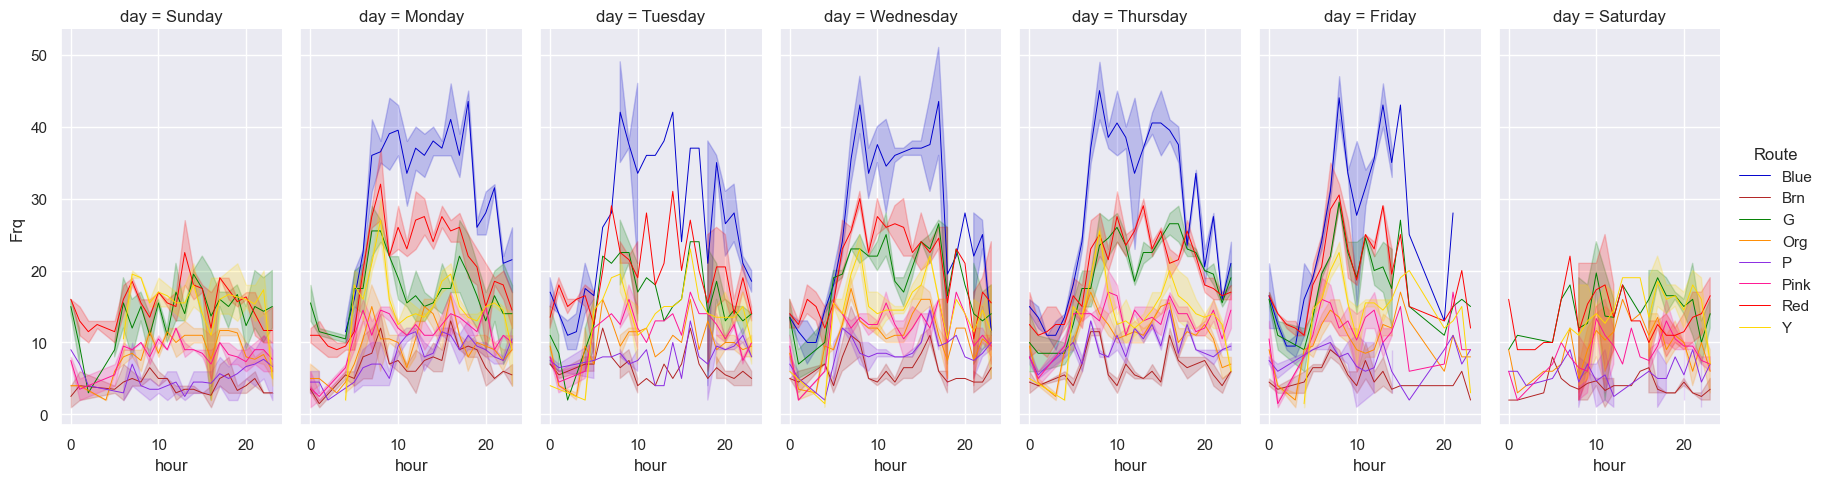

In [23]:
#sns.set_style("white")
sns.set(font_scale=1)
clrs = ["mediumblue", "firebrick", "green", "darkorange", "blueviolet", "deeppink", "red", "gold"]
order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
g = sns.FacetGrid(df_clean_frequency, col="day", col_wrap=7, hue="Route", height=5, aspect=.5, palette = clrs, col_order=order)
g.map(sns.lineplot, "hour", "Frq", linewidth=.7)
g.add_legend()

# EDA

### Initial Categorical EDA - Arrival Times

In [117]:
#what stations are we collecting data from?
df_clean.Station_Name.value_counts()

Grand              228
Logan Square       227
California         214
Oakton-Skokie      174
Halsted            129
Polk               122
Addison             44
South Boulevard     17
Name: Station_Name, dtype: int64

In [118]:
#what stations are we collecting data from?
#how many datapoints do we have for each line (route)?
df_clean[["Route","Station_ID", "Station_Name"]].value_counts()

Route  Station_ID  Station_Name   
Red    40330       Grand              228
Blue   41020       Logan Square       227
G      41360       California         214
Y      41680       Oakton-Skokie      174
Org    41130       Halsted            129
Pink   41030       Polk               122
Brn    41440       Addison             44
P      40840       South Boulevard     17
dtype: int64

In [119]:
#how many arrivals  per run per station do we have data for?
pd.set_option('display.max_rows', None)
df_runs_count = pd.DataFrame(df_clean[["Route","Run_Number"]].groupby("Route").value_counts())
df_runs_count = df_runs_count.sort_values(by=['Route','Run_Number'])
df_runs_count

0
Route Run_Number    
Blue  101          6
      102          4
      103         10
      104          3
      105          3
      106          8
      107          8
      108          8
      109          7
      110          8
      111          7
      112         10
      113          2
      114          3
      115          4
      116          2
      117         11
      118          7
      119         11
      120          9
      121          3
      122          2
      124          2
      202          2
      203          3
      204          6
      205          8
      206          8
      207         10
      208          3
      209          5
      210          5
      211          8
      212          4
      213          7
      214          6
      215          5
      216          5
      217          2
      218          2
Brn   401          3
      402          3
      403          3
      404          4
      405          3
      406          4
      407          3
      408          2
      409          3
      410          2
      411          2
      412          2
      413          2
      414          2
      415          2
      417          1
      418          2
      419          1
G     1            7
      2            9
      3            6
      4            7
      5            8
      6            8
      7           11
      8            9
      9           14
      10          10
      11           2
      12           5
      13           4
      14           5
      15           2
      16           2
      601         10
      602         11
      603         11
      604          7
      605          4
      606         12
      607         15
      608          9
      609          5
      610          5
      611          7
      612          5
      613          4
Org   701          7
      702          6
      703          9
      704          7
      705         10
      706         13
      707         12
      708         18
      709         13
      710         10
      711          5
      712          8
      713          7
      714          4
P     501          3
      503          1
      504          1
      506          2
      507          1
      509          2
      511          1
      512          1
      513          1
      514          2
      515          1
      517          1
Pink  301         11
      302         13
      303         11
      304         11
      305         13
      306          9
      307         15
      308         13
      309          4
      310          6
      311          7
      313          4
      314          3
      315          2
Red   801         10
      802          8
      803          5
      804          8
      805          7
      806          1
      807          9
      808         10
      809         10
      811          2
      812          4
      813          5
      814          4
      815          3
      817          7
      818          5
      819          6
      820          5
      821          6
      822          4
      823          6
      901          7
      902          6
      903         10
      904          9
      905          4
      906         11
      907          5
      908          8
      909          5
      910          4
      911          4
      912          5
      913          4
      914          5
      915          6
      917          3
      918          1
      919          1
      930          5
Y     502         16
      591         52
      592         46
      593         18
      594         25
      595         17

In [120]:
#how many runs per route do we have data for?
df_runs = pd.DataFrame(df_clean[["Route","Run_Number"]].value_counts()).reset_index()
df_runs = df_runs.groupby("Route")["Run_Number"].nunique()
df_runs

Route
Blue    40
Brn     18
G       29
Org     14
P       12
Pink    14
Red     40
Y        6
Name: Run_Number, dtype: int64

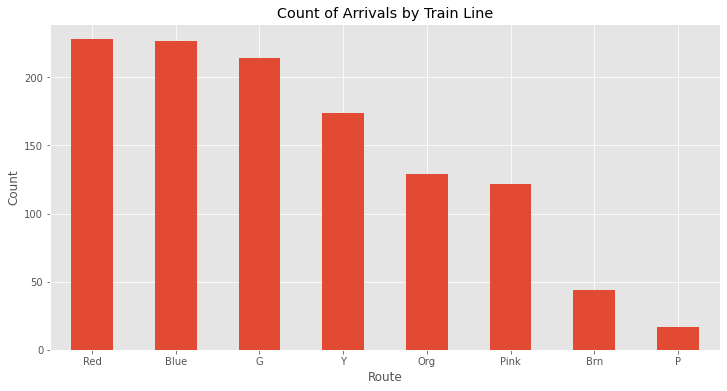

In [121]:
#barplot of # of arrivals
df_clean.Route.value_counts().plot(kind="bar")
plt.title("Count of Arrivals by Train Line")
plt.xlabel("Route")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

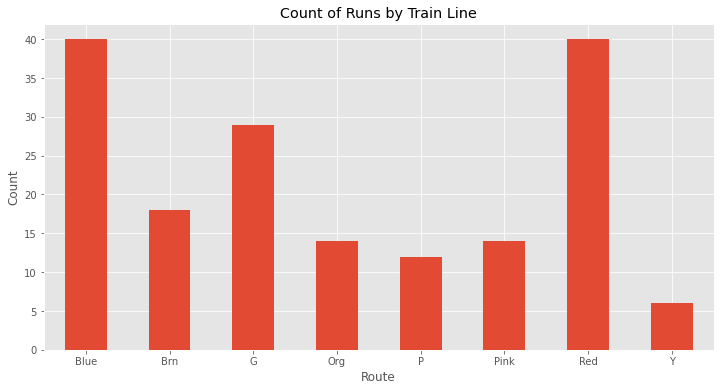

In [122]:
#barplot of # of runs
df_runs.plot(kind="bar")
plt.title("Count of Runs by Train Line")
plt.xlabel("Route")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

AttributeError: 'list' object has no attribute 'xaxis'

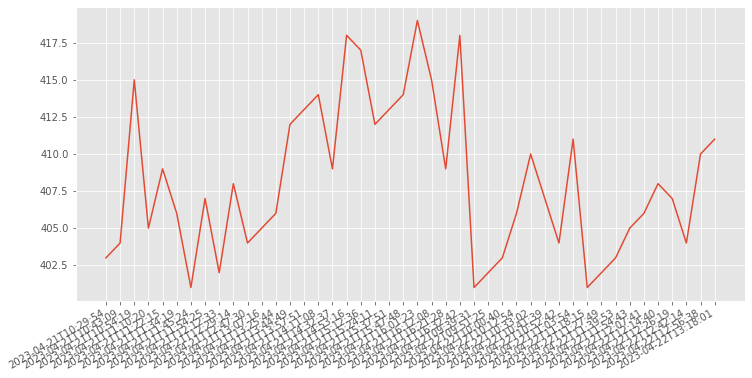

In [138]:
#df_brown = df.loc[df["Route"] == "Brn"]
#a_time = df_brown.Arrival_Time
#run = df_brown.Run_Number
#fig = plt.figure()
#ax = plt.plot(a_time,run)
#plt.xticks(rotation = 45)
#fig.autofmt_xdate()
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#plt.title("Brown Line Run Arrival Times")
#plt.xlabel("Arrival Time")
#plt.ylabel("Run")
#plt.show()

In [142]:
#Looking just at the Brown line
df_brown = df_clean.loc[df_clean["Route"] == "Brn"]
df_brown = df_brown.sort_values(by=["Arrival_Time"])
df_brown

Station_ID Stop_ID Station_Name Destination Route Run_Number  \
12        41440   30278      Addison        Loop   Brn        403   
53        41440   30278      Addison        Loop   Brn        404   
74        41440   30278      Addison        Loop   Brn        415   
113       41440   30278      Addison        Loop   Brn        405   
148       41440   30278      Addison        Loop   Brn        409   
172       41440   30278      Addison        Loop   Brn        406   
199       41440   30278      Addison        Loop   Brn        401   
222       41440   30278      Addison        Loop   Brn        407   
265       41440   30278      Addison        Loop   Brn        402   
311       41440   30278      Addison        Loop   Brn        408   
367       41440   30278      Addison        Loop   Brn        404   
414       41440   30278      Addison        Loop   Brn        405   
472       41440   30278      Addison        Loop   Brn        406   
514       41440   30278      Addison        Loop   Brn        412   
554       41440   30278      Addison        Loop   Brn        413   
585       41440   30278      Addison        Loop   Brn        414   
638       41440   30278      Addison        Loop   Brn        409   
691       41440   30278      Addison        Loop   Brn        418   
744       41440   30278      Addison        Loop   Brn        417   
783       41440   30278      Addison        Loop   Brn        412   
821       41440   30278      Addison        Loop   Brn        413   
852       41440   30278      Addison        Loop   Brn        414   
892       41440   30278      Addison        Loop   Brn        419   
926       41440   30278      Addison        Loop   Brn        415   
956       41440   30278      Addison        Loop   Brn        409   
991       41440   30278      Addison        Loop   Brn        418   
1011      41440   30278      Addison        Loop   Brn        401   
1029      41440   30278      Addison        Loop   Brn        402   
1045      41440   30278      Addison        Loop   Brn        403   
1066      41440   30278      Addison        Loop   Brn        406   
1097      41440   30278      Addison        Loop   Brn        410   
1115      41440   30278      Addison        Loop   Brn        407   
1131      41440   30278      Addison        Loop   Brn        404   
1149      41440   30278      Addison        Loop   Brn        411   
1178      41440   30278      Addison        Loop   Brn        401   
1193      41440   30278      Addison        Loop   Brn        402   
1219      41440   30278      Addison        Loop   Brn        403   
1252      41440   30278      Addison        Loop   Brn        405   
1278      41440   30278      Addison        Loop   Brn        406   
1293      41440   30278      Addison        Loop   Brn        408   
1312      41440   30278      Addison        Loop   Brn        407   
1336      41440   30278      Addison        Loop   Brn        404   
1366      41440   30278      Addison        Loop   Brn        410   
1401      41440   30278      Addison        Loop   Brn        411   

         Prediction_Time        Arrival_Time Is_Approaching Is_Scheduled  \
12   2023-04-21 10:28:54 2023-04-21 10:29:54              1            0   
53   2023-04-21 10:42:09 2023-04-21 10:43:09              1            0   
74   2023-04-21 10:53:19 2023-04-21 10:54:19              1            0   
113  2023-04-21 11:09:20 2023-04-21 11:10:20              1            0   
148  2023-04-21 11:21:15 2023-04-21 11:22:15              1            0   
172  2023-04-21 11:33:19 2023-04-21 11:34:19              1            0   
199  2023-04-21 11:44:24 2023-04-21 11:45:24              1            0   
222  2023-04-21 11:53:25 2023-04-21 11:54:25              1            0   
265  2023-04-21 12:11:33 2023-04-21 12:12:33              1            0   
311  2023-04-21 12:28:14 2023-04-21 12:29:14              1            0   
367  2023-04-21 12:46:30 2023-04-21 12:47:30              1    

In [153]:
#Add a new column to calculate headways, or the difference between the arrival time of one run and the next
df_brown['dArrival_Time'] = df_brown['Arrival_Time'] - df_brown['Arrival_Time'].shift(1)
df_brown

Station_ID Stop_ID Station_Name Destination Route Run_Number  \
12        41440   30278      Addison        Loop   Brn        403   
53        41440   30278      Addison        Loop   Brn        404   
74        41440   30278      Addison        Loop   Brn        415   
113       41440   30278      Addison        Loop   Brn        405   
148       41440   30278      Addison        Loop   Brn        409   
172       41440   30278      Addison        Loop   Brn        406   
199       41440   30278      Addison        Loop   Brn        401   
222       41440   30278      Addison        Loop   Brn        407   
265       41440   30278      Addison        Loop   Brn        402   
311       41440   30278      Addison        Loop   Brn        408   
367       41440   30278      Addison        Loop   Brn        404   
414       41440   30278      Addison        Loop   Brn        405   
472       41440   30278      Addison        Loop   Brn        406   
514       41440   30278      Addison        Loop   Brn        412   
554       41440   30278      Addison        Loop   Brn        413   
585       41440   30278      Addison        Loop   Brn        414   
638       41440   30278      Addison        Loop   Brn        409   
691       41440   30278      Addison        Loop   Brn        418   
744       41440   30278      Addison        Loop   Brn        417   
783       41440   30278      Addison        Loop   Brn        412   
821       41440   30278      Addison        Loop   Brn        413   
852       41440   30278      Addison        Loop   Brn        414   
892       41440   30278      Addison        Loop   Brn        419   
926       41440   30278      Addison        Loop   Brn        415   
956       41440   30278      Addison        Loop   Brn        409   
991       41440   30278      Addison        Loop   Brn        418   
1011      41440   30278      Addison        Loop   Brn        401   
1029      41440   30278      Addison        Loop   Brn        402   
1045      41440   30278      Addison        Loop   Brn        403   
1066      41440   30278      Addison        Loop   Brn        406   
1097      41440   30278      Addison        Loop   Brn        410   
1115      41440   30278      Addison        Loop   Brn        407   
1131      41440   30278      Addison        Loop   Brn        404   
1149      41440   30278      Addison        Loop   Brn        411   
1178      41440   30278      Addison        Loop   Brn        401   
1193      41440   30278      Addison        Loop   Brn        402   
1219      41440   30278      Addison        Loop   Brn        403   
1252      41440   30278      Addison        Loop   Brn        405   
1278      41440   30278      Addison        Loop   Brn        406   
1293      41440   30278      Addison        Loop   Brn        408   
1312      41440   30278      Addison        Loop   Brn        407   
1336      41440   30278      Addison        Loop   Brn        404   
1366      41440   30278      Addison        Loop   Brn        410   
1401      41440   30278      Addison        Loop   Brn        411   

         Prediction_Time        Arrival_Time Is_Approaching Is_Scheduled  \
12   2023-04-21 10:28:54 2023-04-21 10:29:54              1            0   
53   2023-04-21 10:42:09 2023-04-21 10:43:09              1            0   
74   2023-04-21 10:53:19 2023-04-21 10:54:19              1            0   
113  2023-04-21 11:09:20 2023-04-21 11:10:20              1            0   
148  2023-04-21 11:21:15 2023-04-21 11:22:15              1            0   
172  2023-04-21 11:33:19 2023-04-21 11:34:19              1            0   
199  2023-04-21 11:44:24 2023-04-21 11:45:24              1            0   
222  2023-04-21 11:53:25 2023-04-21 11:54:25              1            0   
265  2023-04-21 12:11:33 2023-04-21 12:12:33              1            0   
311  2023-04-21 12:28:14 2023-04-21 12:29:14              1            0   
367  2023-04-21 12:46:30 2023-04-21 12:47:30              1    

In [165]:
#do the same for all lines
df_red = df_clean.loc[df_clean["Route"] == "Red"].sort_values(by=["Arrival_Time"])
df_red['dArrival_Time'] = df_red['Arrival_Time'] - df_red['Arrival_Time'].shift(1)

df_pink = df_clean.loc[df_clean["Route"] == "Pink"].sort_values(by=["Arrival_Time"])
df_pink['dArrival_Time'] = df_pink['Arrival_Time'] - df_pink['Arrival_Time'].shift(1)

df_purp = df_clean.loc[df_clean["Route"] == "P"].sort_values(by=["Arrival_Time"])
df_purp['dArrival_Time'] = df_purp['Arrival_Time'] - df_purp['Arrival_Time'].shift(1)

df_yell = df_clean.loc[df_clean["Route"] == "Y"].sort_values(by=["Arrival_Time"])
df_yell['dArrival_Time'] = df_yell['Arrival_Time'] - df_yell['Arrival_Time'].shift(1)

df_blue = df_clean.loc[df_clean["Route"] == "Blue"].sort_values(by=["Arrival_Time"])
df_blue['dArrival_Time'] = df_blue['Arrival_Time'] - df_blue['Arrival_Time'].shift(1)

df_green = df_clean.loc[df_clean["Route"] == "G"].sort_values(by=["Arrival_Time"])
df_green['dArrival_Time'] = df_green['Arrival_Time'] - df_green['Arrival_Time'].shift(1)

df_org = df_clean.loc[df_clean["Route"] == "Org"].sort_values(by=["Arrival_Time"])
df_org['dArrival_Time'] = df_org['Arrival_Time'] - df_org['Arrival_Time'].shift(1)

In [193]:
#calculate and store average headway for each line
d = {
    'red': [df_red["dArrival_Time"].mean()],
    'brn': [df_brown["dArrival_Time"].mean()],
    'purp': [df_purp["dArrival_Time"].mean()],
    'yell': [df_yell["dArrival_Time"].mean()],
    'org': [df_org["dArrival_Time"].mean()],
    'green': [df_green["dArrival_Time"].mean()],
    'pink': [df_pink["dArrival_Time"].mean()],
    'blue': [df_blue["dArrival_Time"].mean()]
}

hway_avg = pd.DataFrame(data=d)
hway_avg.head()

red                       brn                   purp  \
0 0 days 00:07:07.303964757 0 days 00:37:23.883720930 0 days 01:39:07.437500   

                       yell                       org  \
0 0 days 00:09:17.739884393 0 days 00:12:33.851562500   

                      green                      pink  \
0 0 days 00:07:33.370892018 0 days 00:13:15.685950413   

                       blue  
0 0 days 00:01:36.960176991

In [194]:
#convert timedelta to minutes
hway_avg["red"] = hway_avg["red"].dt.total_seconds().div(60).astype(int)
hway_avg["brn"] = hway_avg["brn"].dt.total_seconds().div(60).astype(int)
hway_avg["purp"] = hway_avg["purp"].dt.total_seconds().div(60).astype(int)
hway_avg["yell"] = hway_avg["yell"].dt.total_seconds().div(60).astype(int)
hway_avg["org"] = hway_avg["org"].dt.total_seconds().div(60).astype(int)
hway_avg["green"] = hway_avg["green"].dt.total_seconds().div(60).astype(int)
hway_avg["pink"] = hway_avg["pink"].dt.total_seconds().div(60).astype(int)
hway_avg["blue"] = hway_avg["blue"].dt.total_seconds().div(60).astype(int)

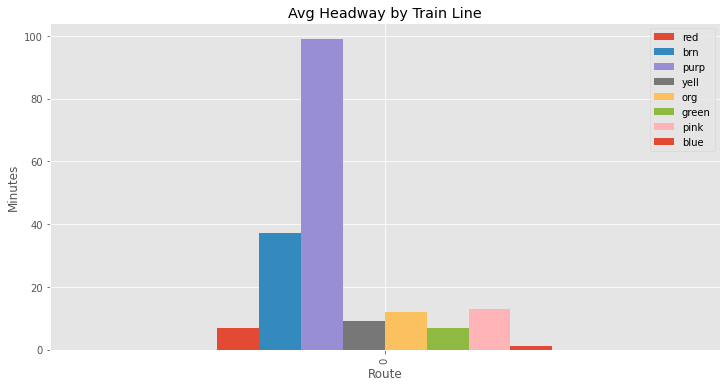

In [196]:
#barplot of avg headways
hway_avg.plot(kind="bar")
plt.title("Avg Headway by Train Line")
plt.xlabel("Route")
plt.ylabel("Minutes")
plt.show()

## Regression
https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

In [411]:
df_clean

Station_ID  Stop_ID     Station_Name    Destination Route  Run_Number  \
0           40330    30065            Grand  95th/Dan Ryan   Red         809   
1           40330    30065            Grand  95th/Dan Ryan   Red         809   
3           41360    30265       California   Ashland/63rd     G           2   
4           40840    30164  South Boulevard           Loop     P         506   
5           41130    30215          Halsted           Loop   Org         706   
...           ...      ...              ...            ...   ...         ...   
35465       41020    30197     Logan Square         O'Hare  Blue         222   
35466       41360    30265       California   Ashland/63rd     G          15   
35467       41440    30278          Addison           Loop   Brn         425   
35468       41020    30197     Logan Square         O'Hare  Blue         222   
35470       41440    30278          Addison           Loop   Brn         425   

          Prediction_Time        Arrival_Time  Is_Approaching  Is_Scheduled  \
0     2023-04-21 10:25:05 2023-04-21 10:26:05               1             0   
1     2023-04-21 10:25:57 2023-04-21 10:26:57               1             0   
3     2023-04-21 10:26:34 2023-04-21 10:27:34               1             0   
4     2023-04-21 10:26:26 2023-04-21 10:27:26               1             0   
5     2023-04-21 10:26:57 2023-04-21 10:27:57               1             0   
...                   ...                 ...             ...           ...   
35465 2023-05-10 18:15:59 2023-05-10 18:16:59               1             0   
35466 2023-05-10 18:15:46 2023-05-10 18:16:46               1             0   
35467 2023-05-10 18:15:59 2023-05-10 18:16:59               1             0   
35468 2023-05-10 18:16:39 2023-05-10 18:17:39               1             0   
35470 2023-05-10 18:15:59 2023-05-10 18:16:59               1             0   

       Is_Delayed  Is_Fault  month  weekday  day  hour      time  
0               0         0      4        4   21    10  10:26:05  
1               0         0      4        4   21    10  10:26:57  
3               0         0      4        4   21    10  10:27:34  
4               0         0      4        4   21    10  10:27:26  
5               0         0      4        4   21    10  10:27:57  
...           ...       ...    ...      ...  ...   ...       ...  
35465           0         0      5        2   10    18  18:16:59  
35466           0         0      5        2   10    18  18:16:46  
35467           0         0      5        2   10    18  18:16:59  
35468           0         0      5        2   10    18  18:17:39  
35470           0     40330      5        2   10    18  18:16:59  

[29577 rows x 17 columns]

In [412]:
df_brn = df_clean_frequency.loc[df_clean_frequency.Route == 'Brn']
df_brn

Arrival_Time Route  Frq        date  hour        day
1    2023-04-21 10:00:00   Brn    3  2023-04-21    10     Friday
9    2023-04-21 11:00:00   Brn    5  2023-04-21    11     Friday
17   2023-04-21 12:00:00   Brn    3  2023-04-21    12     Friday
25   2023-04-21 13:00:00   Brn    4  2023-04-21    13     Friday
32   2023-04-21 14:00:00   Brn    3  2023-04-21    14     Friday
...                  ...   ...  ...         ...   ...        ...
2159 2023-05-10 14:00:00   Brn    5  2023-05-10    14  Wednesday
2167 2023-05-10 15:00:00   Brn    6  2023-05-10    15  Wednesday
2175 2023-05-10 16:00:00   Brn   10  2023-05-10    16  Wednesday
2183 2023-05-10 17:00:00   Brn    6  2023-05-10    17  Wednesday
2191 2023-05-10 18:00:00   Brn    3  2023-05-10    18  Wednesday

[285 rows x 6 columns]

In [413]:
df_brn = df_brn[["Arrival_Time", "Frq"]]
df_brn

Arrival_Time  Frq
1    2023-04-21 10:00:00    3
9    2023-04-21 11:00:00    5
17   2023-04-21 12:00:00    3
25   2023-04-21 13:00:00    4
32   2023-04-21 14:00:00    3
...                  ...  ...
2159 2023-05-10 14:00:00    5
2167 2023-05-10 15:00:00    6
2175 2023-05-10 16:00:00   10
2183 2023-05-10 17:00:00    6
2191 2023-05-10 18:00:00    3

[285 rows x 2 columns]

In [414]:
df_brn.set_index('Arrival_Time', inplace=True)

In [415]:
df_brn

Frq
Arrival_Time            
2023-04-21 10:00:00    3
2023-04-21 11:00:00    5
2023-04-21 12:00:00    3
2023-04-21 13:00:00    4
2023-04-21 14:00:00    3
...                  ...
2023-05-10 14:00:00    5
2023-05-10 15:00:00    6
2023-05-10 16:00:00   10
2023-05-10 17:00:00    6
2023-05-10 18:00:00    3

[285 rows x 1 columns]

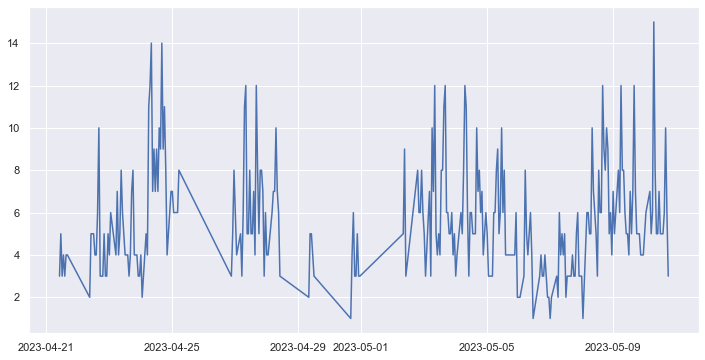

In [416]:
plt.plot(df_brn)

### Impute

In [ ]:
#generate df of all hours on all days between two dates
#use datetimeindexdifference to find which dates are missing
#https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DatetimeIndex.difference.html#pandas-datetimeindex-difference
#add those missing date/hours to df_brn w/ NaN values for runs
#find way to impute

### Stationarity

In [436]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

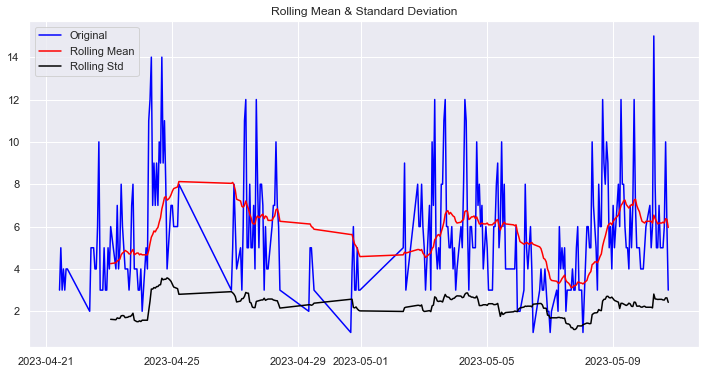

Results of Dickey-Fuller Test:
Test Statistic                  -3.335190
p-value                          0.013377
#Lags Used                       8.000000
Number of Observations Used    276.000000
Critical Value (1%)             -3.454267
Critical Value (5%)             -2.872070
Critical Value (10%)            -2.572381
dtype: float64


In [437]:
#dickey fuller test to judge stationarity
#looking for constant mean and test statistic < critical value
test_stationarity(df_brn)

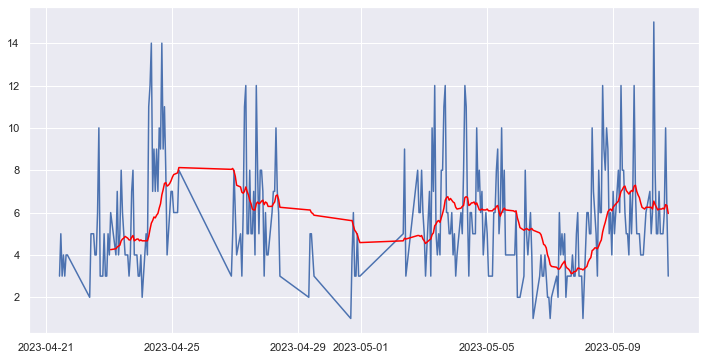

In [419]:
#not sure I visually see a strong positive or negative trend, but we will address any unseen trend by applying
#smoothing through moving average with a time period of 24 hours

#find the rolling mean and plot
moving_avg = df_brn.rolling(24).mean()
plt.plot(df_brn)
plt.plot(moving_avg, color='red')

In [420]:
#subtract moving mean from the original series
df_brn_moving_avg_diff = df_brn - moving_avg
df_brn_moving_avg_diff.dropna(inplace=True) #drop first 24 values that are null
df_brn_moving_avg_diff.head()

Frq
Arrival_Time                 
2023-04-23 01:00:00  1.750000
2023-04-23 05:00:00 -0.291667
2023-04-23 06:00:00  2.625000
2023-04-23 07:00:00 -0.416667
2023-04-23 08:00:00  0.541667

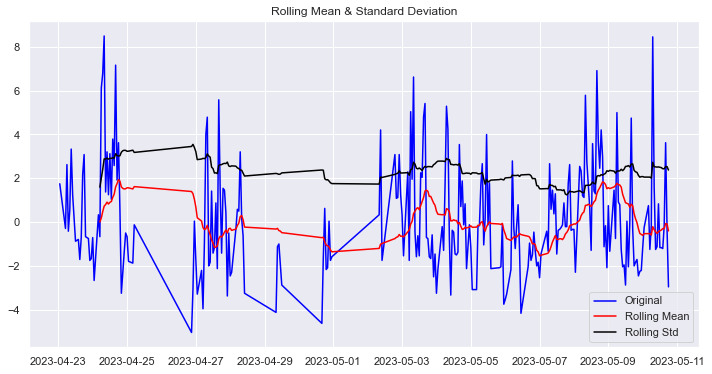

Results of Dickey-Fuller Test:
Test Statistic                -7.826803e+00
p-value                        6.449205e-12
#Lags Used                     1.000000e+00
Number of Observations Used    2.600000e+02
Critical Value (1%)           -3.455754e+00
Critical Value (5%)           -2.872721e+00
Critical Value (10%)          -2.572728e+00
dtype: float64


In [421]:
#and plot
test_stationarity(df_brn_moving_avg_diff)
#we see variation in the rolling values but there is no specific trend
#we are 99% confident that the series is stationary

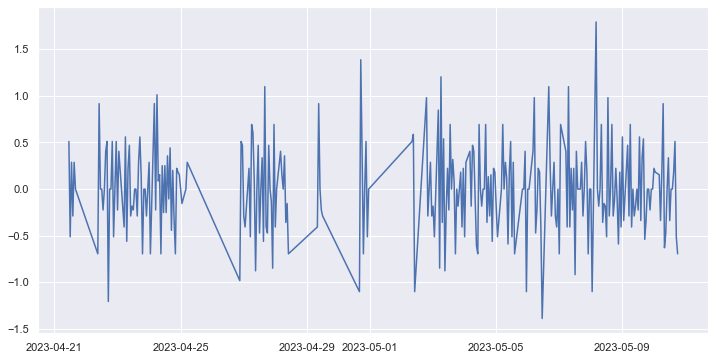

In [550]:
#remove both trend and seasonality by modeling differencing (difference of the value at a particular time with that of the previous time)
#reduce trend by log transforming
df_brn_log = np.log(df_brn)
df_brn_log_diff = df_brn_log - df_brn_log.shift()
plt.plot(df_brn_log_diff)

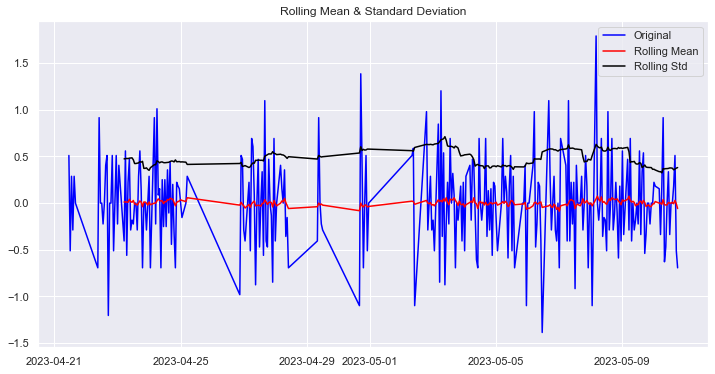

Results of Dickey-Fuller Test:
Test Statistic                -1.106343e+01
p-value                        4.746328e-20
#Lags Used                     7.000000e+00
Number of Observations Used    2.760000e+02
Critical Value (1%)           -3.454267e+00
Critical Value (5%)           -2.872070e+00
Critical Value (10%)          -2.572381e+00
dtype: float64


In [458]:
#and run it through the stationarity test
df_brn_log_diff.dropna(inplace=True)
test_stationarity(df_brn_log_diff)
#99% confident it's stationary

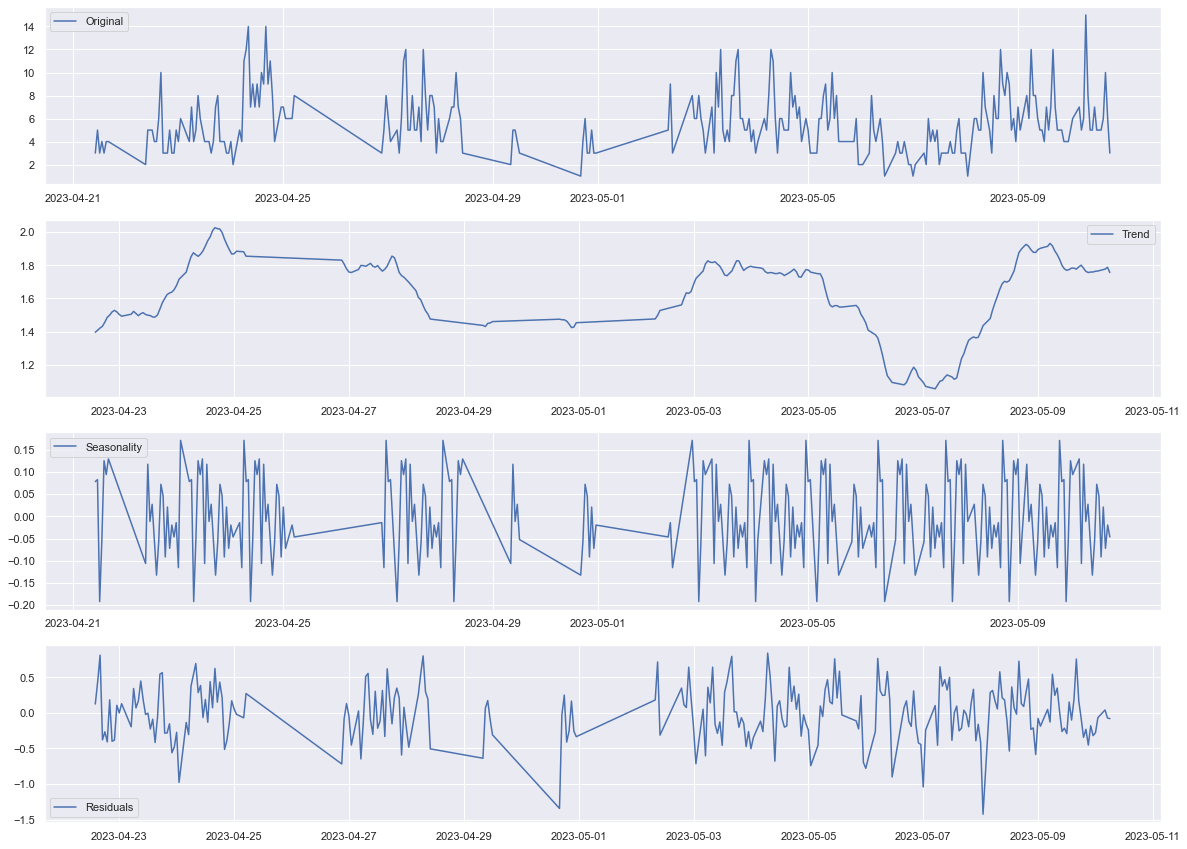

In [440]:
#can also remove trend and seasonality by decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_brn_log, period=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,15))
plt.subplot(411)
plt.plot(df_brn, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

In [425]:
#and use the residuals for the dickey fuller test
df_brn_decomp = residual
df_brn_decomp.dropna(inplace=True)
test_stationarity(df_brn_decomp)
#this is stationary because
#test statistic is lower than 1% critical values.
#the mean and std variations have small variations with time.

Results of Dickey-Fuller Test:
Test Statistic                -9.039176e+00
p-value                        5.189426e-15
#Lags Used                     4.000000e+00
Number of Observations Used    2.560000e+02
Critical Value (1%)           -3.456155e+00
Critical Value (5%)           -2.872897e+00
Critical Value (10%)          -2.572822e+00
dtype: float64


## ARIMA Modeling

Let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values

Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let me explain these dependent parameters:
- p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).
- q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).
- d :This is the number of differences or the number of non-seasonal differences .

To Figure out the p and q values, we can use:
- Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4
- Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).

In [450]:
from statsmodels.tsa.arima.model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_brn_log_diff, nlags=20)
lag_pacf = pacf(df_brn_log_diff, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_brn_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_brn_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_brn_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_brn_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#because PACF crosses the upper confidence interval (top dotted line) for the first time close to 1, p=1
#because ACF crosses the upper confidence interval for the first time close to 1, q=1


In [459]:
#fix issue with no associated period. set dateindex period to hourly
df_brn_log_diff.index = df_brn_log_diff.index.to_period('H')

In [455]:
pd.plotting.register_matplotlib_converters()

In [461]:
#AR model
model = ARIMA(df_brn_log_diff, order=(2,1,0))
results_AR = model.fit()
plt.plot(df_brn_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.xticks(range(0,len(df_brn_log_diff.index)),df_brn_log_diff.index)
plt.title('RSS: %.4f'% sum((results_ar.fittedvalues-df_brn_log_diff)**2))

ConversionError: Failed to convert value(s) to axis units: (datetime.date(2000, 1, 1), datetime.date(2010, 1, 1))

In [473]:
model = ARIMA(df_brn_log_diff['Frq'], order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Frq   No. Observations:                  284
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -177.839
Date:                Sun, 14 May 2023   AIC                            361.678
Time:                        12:31:25   BIC                            372.614
Sample:                    04-21-2023   HQIC                           366.063
                         - 05-10-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3586      0.051     -6.967      0.000      -0.459      -0.258
ma.L1         -1.0000     30.554     -0.033      0.974     -60.885      58.885
sigma2         0.2012      6.144      0.033      0.974     -11.841      12.243
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.18   Prob(JB):                         0.63
Heteroskedasticity (H):               1.17   Skew:                            -0.01
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [510]:
# split into train and test sets
X = df_brn_log_diff.Frq
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [513]:
test

Arrival_Time
2023-05-06 05:00    0.980829
2023-05-06 06:00   -0.470004
2023-05-06 07:00   -0.223144
2023-05-06 08:00    0.223144
2023-05-06 09:00    0.182322
2023-05-06 10:00   -0.405465
2023-05-06 11:00   -1.386294
2023-05-06 16:00    1.098612
2023-05-06 17:00    0.287682
2023-05-06 18:00   -0.287682
2023-05-06 19:00    0.000000
2023-05-06 20:00    0.287682
2023-05-06 21:00   -0.287682
2023-05-06 22:00   -0.405465
2023-05-06 23:00    0.000000
2023-05-07 00:00   -0.693147
2023-05-07 01:00    0.693147
2023-05-07 05:00    0.405465
2023-05-07 06:00   -0.405465
2023-05-07 07:00    1.098612
2023-05-07 08:00   -0.405465
2023-05-07 09:00    0.223144
2023-05-07 10:00   -0.223144
2023-05-07 11:00    0.223144
2023-05-07 12:00   -0.916291
2023-05-07 13:00    0.405465
2023-05-07 14:00    0.000000
2023-05-07 15:00    0.000000
2023-05-07 16:00    0.000000
2023-05-07 17:00    0.287682
2023-05-07 18:00   -0.287682
2023-05-07 19:00    0.000000
2023-05-07 20:00    0.510826
2023-05-07 21:00    0.182322
2

In [511]:
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(1,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.151171, expected=0.980829
predicted=0.621659, expected=-0.470004
predicted=0.443443, expected=-0.223144
predicted=-0.376549, expected=0.223144
predicted=-0.053633, expected=0.182322
predicted=0.207603, expected=-0.405465
predicted=-0.041571, expected=-1.386294
predicted=-0.785652, expected=1.098612
predicted=-0.461066, expected=0.287682
predicted=0.784704, expected=-0.287682
predicted=0.060995, expected=0.000000
predicted=-0.174264, expected=0.287682
predicted=0.113717, expected=-0.287682
predicted=0.060775, expected=-0.405465
predicted=-0.334379, expected=0.000000
predicted=-0.244841, expected=-0.693147
predicted=-0.273597, expected=0.693147
predicted=-0.153174, expected=0.405465
predicted=0.579381, expected=-0.405465
predicted=0.082995, expected=1.098612
predicted=0.183203, expected=-0.405465
predicted=0.519951, expected=0.223144
predicted=-0.161556, expected=-0.223144
predicted=0.050111, expected=0.223144
predicted=-0.050370, expected=-0.916291
predicted=-0.214751, expec

In [512]:
# evaluate forecasts
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.652


In [541]:
# plot forecasts against actual outcomes
from matplotlib import pyplot
#test = pd.DataFrame(test)
#test.index = test.index.to_timestamp()
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Attempt 2

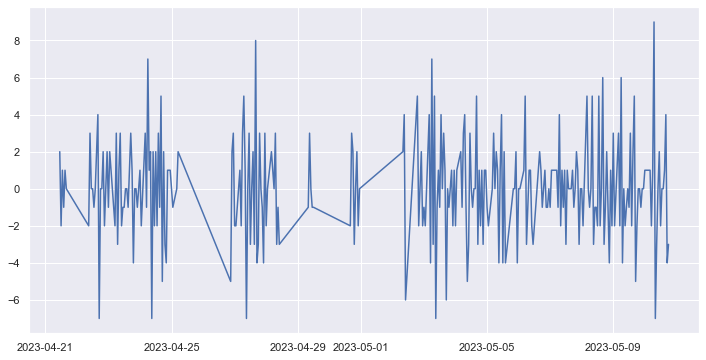

In [572]:
#remove both trend and seasonality by modeling differencing (difference of the value at a particular time with that of the previous time)
#reduce trend by log transforming
df_brn_diff = df_brn - df_brn.shift()
plt.plot(df_brn_diff)

In [573]:
#find train set size
size = int(len(df_brn_diff) * 0.22)
size

62

In [575]:
#train test split
df_train = df_brn_diff[:-size]
df_train=df_train.dropna()
#df_train.index = df_train.index.to_timestamp()
df_test = df_brn_diff[-size:]
df_test=df_test.dropna()
#df_test.index = df_test.index.to_timestamp()

In [576]:
df_train

Frq
Arrival_Time            
2023-04-21 11:00:00  2.0
2023-04-21 12:00:00 -2.0
2023-04-21 13:00:00  1.0
2023-04-21 14:00:00 -1.0
2023-04-21 15:00:00  1.0
...                  ...
2023-05-07 18:00:00 -1.0
2023-05-07 19:00:00  0.0
2023-05-07 20:00:00  2.0
2023-05-07 21:00:00  1.0
2023-05-07 22:00:00 -3.0

[222 rows x 1 columns]

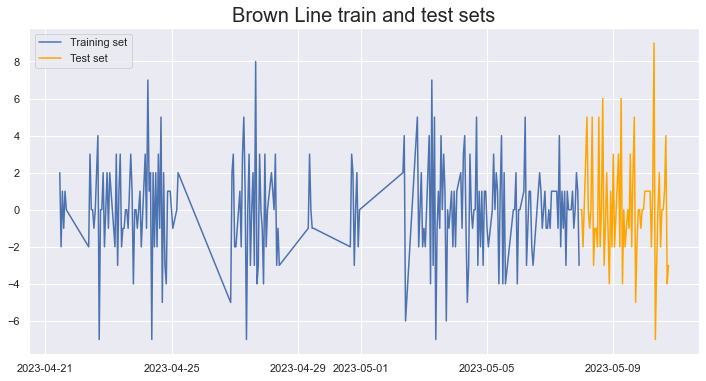

In [577]:
#visualize train test split
plt.title('Brown Line train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


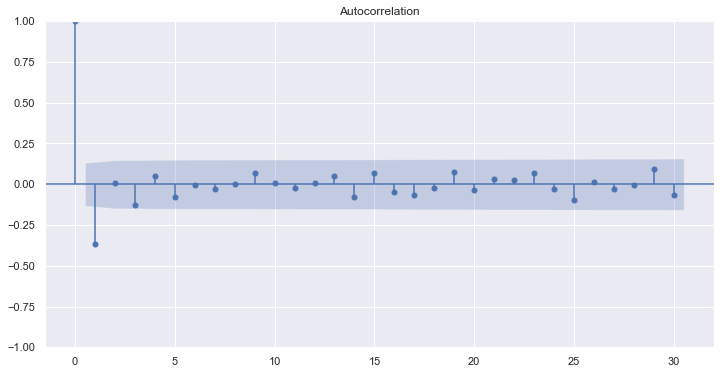

In [579]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.stattools import acf, pacf

acf_original = plot_acf(df_train.Frq, lags=30)
pacf_original = plot_pacf(df_train.Frq, lags=30)

https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f

Time series models you’ll soon learn about, such as Auto Regression (AR), Moving Averages (MA), or their combinations (ARMA), require you to specify one or more parameters. These can be obtained by looking at ACF and PACF plots.

In a nutshell:

- If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.
- If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.
- If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).
- If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

In [ ]:
#let's try AR (auto-regressive model) because ACF shows a gradual decay with less significant spikes after 1
#ARIMA(1,1,0)

In [600]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())
#AIC looks bad?

                               SARIMAX Results                                
Dep. Variable:                    Frq   No. Observations:                  222
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -502.147
Date:                Sun, 14 May 2023   AIC                           1010.293
Time:                        14:34:24   BIC                           1020.488
Sample:                             0   HQIC                          1014.410
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.6574      0.764     -2.168      0.030      -3.155      -0.159
ma.L2          0.6576      0.498      1.321      0.186      -0.318       1.633
sigma2         5.3131      4.242      1.252      0.2

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


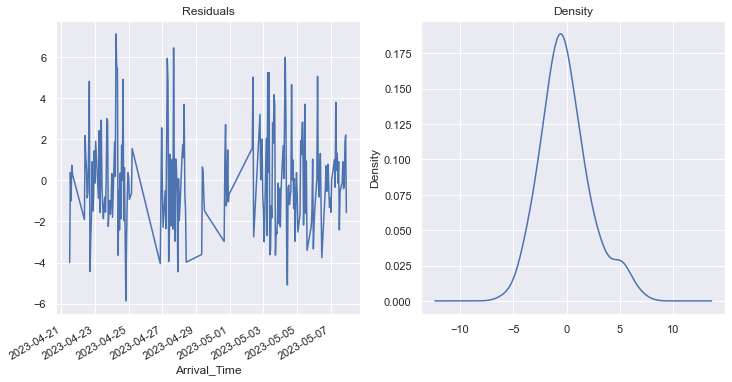

In [601]:
#plot residuals and their density
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()
#looks good. residuals look random and density is approximately normally distributed about 0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


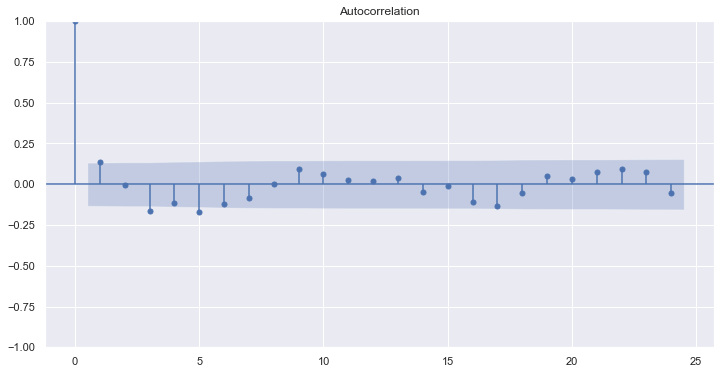

In [602]:
#we can also look at ACF and PACF plots of residuals
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

#looks good. The lower lags barely show any significant ‘spikes’.

In [621]:
#fix??
forecast_test = model_fit.forecast(len(df_test))

df_brn_diff = df_brn_diff.dropna()
df_brn_diff['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df_brn_diff.plot()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
<ipython-input-621-b27418b6cb8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brn_diff['forecast_manual'] = [None]*len(df_train) + list(forecast_test)


<AxesSubplot:xlabel='Arrival_Time'>

### Attempt 3 - Red

In [24]:
df_red = df_clean_frequency.loc[df_clean_frequency.Route == 'Red']
df_red

Arrival_Time Route  Frq        date  hour        day
6    2023-04-21 10:00:00   Red   18  2023-04-21    10     Friday
14   2023-04-21 11:00:00   Red   25  2023-04-21    11     Friday
22   2023-04-21 12:00:00   Red   24  2023-04-21    12     Friday
29   2023-04-21 13:00:00   Red   29  2023-04-21    13     Friday
37   2023-04-21 14:00:00   Red   23  2023-04-21    14     Friday
...                  ...   ...  ...         ...   ...        ...
2164 2023-05-10 14:00:00   Red   22  2023-05-10    14  Wednesday
2172 2023-05-10 15:00:00   Red   28  2023-05-10    15  Wednesday
2180 2023-05-10 16:00:00   Red   21  2023-05-10    16  Wednesday
2188 2023-05-10 17:00:00   Red   23  2023-05-10    17  Wednesday
2195 2023-05-10 18:00:00   Red    5  2023-05-10    18  Wednesday

[314 rows x 6 columns]

In [25]:
df_red = df_red[["Arrival_Time", "Frq"]]
df_red

Arrival_Time  Frq
6    2023-04-21 10:00:00   18
14   2023-04-21 11:00:00   25
22   2023-04-21 12:00:00   24
29   2023-04-21 13:00:00   29
37   2023-04-21 14:00:00   23
...                  ...  ...
2164 2023-05-10 14:00:00   22
2172 2023-05-10 15:00:00   28
2180 2023-05-10 16:00:00   21
2188 2023-05-10 17:00:00   23
2195 2023-05-10 18:00:00    5

[314 rows x 2 columns]

In [26]:
df_red.set_index('Arrival_Time', inplace=True)

In [27]:
df_red

Frq
Arrival_Time            
2023-04-21 10:00:00   18
2023-04-21 11:00:00   25
2023-04-21 12:00:00   24
2023-04-21 13:00:00   29
2023-04-21 14:00:00   23
...                  ...
2023-05-10 14:00:00   22
2023-05-10 15:00:00   28
2023-05-10 16:00:00   21
2023-05-10 17:00:00   23
2023-05-10 18:00:00    5

[314 rows x 1 columns]

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_red.plot()

<Axes: xlabel='Arrival_Time'>

In [31]:
#check for stationarity
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df_red.Frq)

In [34]:
def adfuller_test(arrivals):
    result = adfuller(arrivals)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [35]:
adfuller_test(df_red.Frq)

ADF Test Statistic : -6.0747475219705445
p-value : 1.1286067698350845e-07
#Lags Used : 1
Number of Observations : 312
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
#data is stationary but let's go through the motions anyway

In [36]:
df_red['First Difference'] = df_red.Frq - df_red.Frq.shift(1)
df_red['Seasonal First Difference']=df_red.Frq-df_red.Frq.shift(24)
df_red.head()

/var/folders/ww/j8_ckdzx55zbhxmj1mdxrhd00000gn/T/ipykernel_75620/2247584442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['First Difference'] = df_red.Frq - df_red.Frq.shift(1)
/var/folders/ww/j8_ckdzx55zbhxmj1mdxrhd00000gn/T/ipykernel_75620/2247584442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['Seasonal First Difference']=df_red.Frq-df_red.Frq.shift(24)


Frq  First Difference  Seasonal First Difference
Arrival_Time                                                         
2023-04-21 10:00:00   18               NaN                        NaN
2023-04-21 11:00:00   25               7.0                        NaN
2023-04-21 12:00:00   24              -1.0                        NaN
2023-04-21 13:00:00   29               5.0                        NaN
2023-04-21 14:00:00   23              -6.0                        NaN

In [37]:
#test stationarity again
adfuller_test(df_red['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.8612632082267915
p-value : 3.4060779885036955e-07
#Lags Used : 1
Number of Observations : 288
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


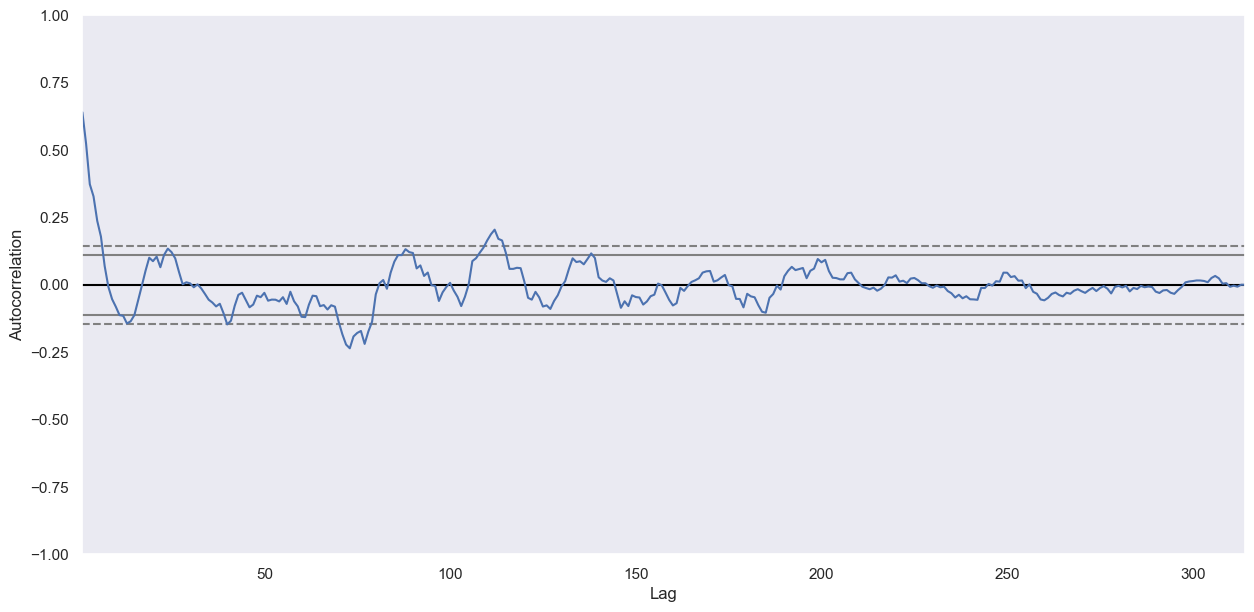

In [38]:
#autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_red.Frq)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


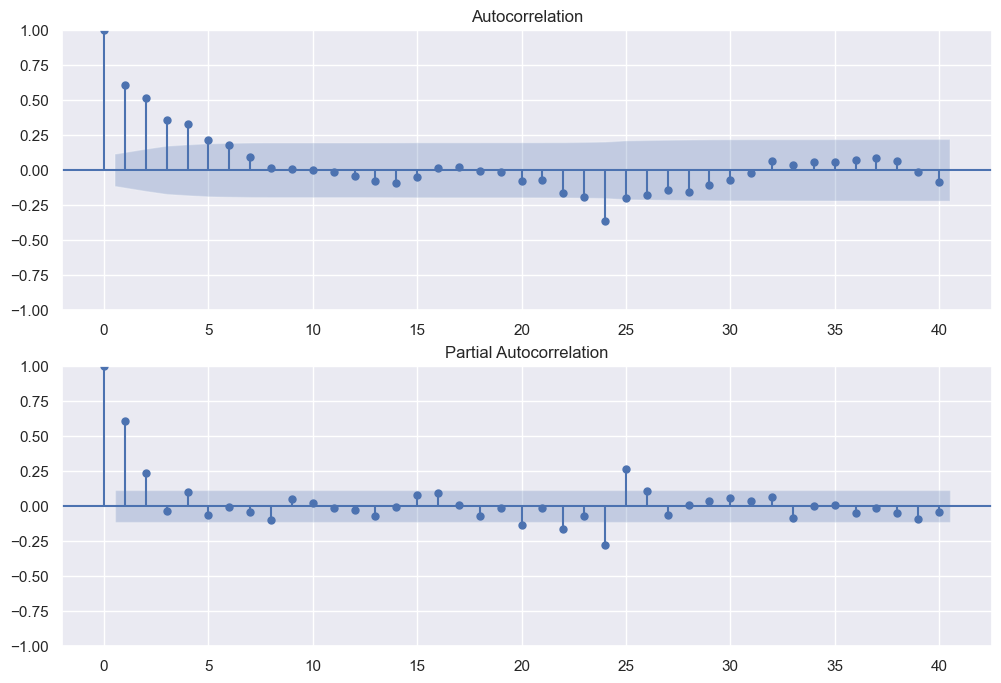

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_red['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_red['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [42]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_red.Frq,order=(1,1,0))
model_fit=model.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Frq   No. Observations:                  314
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -951.116
Date:                Sun, 14 May 2023   AIC                           1906.232
Time:                        17:58:13   BIC                           1913.724
Sample:                             0   HQIC                          1909.226
                                - 314                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3307      0.048     -6.855      0.000      -0.425      -0.236
sigma2        25.5125      1.626     15.692      0.000      22.326      28.699
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                17.51
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.03
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
df_red['forecast']=model_fit.predict(start=100,end=300,dynamic=True)
df_red[['Frq','forecast']].plot(figsize=(12,8))

/var/folders/ww/j8_ckdzx55zbhxmj1mdxrhd00000gn/T/ipykernel_75620/3813963722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red['forecast']=model_fit.predict(start=100,end=300,dynamic=True)


<Axes: xlabel='Arrival_Time'>

In [72]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_red['Frq'],order=(1, 1, 1),seasonal_order=(1,1,1,24))
results=model.fit()
df_red['forecast_1']=results.predict(start=100,end=300,dynamic=True)
df_red[['Frq','forecast_1']].plot(figsize=(12,8))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95078D+00    |proj g|=  5.74713D-02

At iterate    5    f=  2.88658D+00    |proj g|=  2.62542D-02

At iterate   10    f=  2.87000D+00    |proj g|=  3.61889D-03

At iterate   15    f=  2.86747D+00    |proj g|=  3.48174D-02

At iterate   20    f=  2.85716D+00    |proj g|=  5.13075D-03

At iterate   25    f=  2.85555D+00    |proj g|=  3.59421D-03

At iterate   30    f=  2.85533D+00    |proj g|=  1.15143D-03

At iterate   35    f=  2.85531D+00    |proj g|=  3.19813D-04

At iterate   40    f=  2.85531D+00    |proj g|=  5.48770D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<Axes: xlabel='Arrival_Time'>

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45398D+00    |proj g|=  7.56540D-01

At iterate    5    f=  3.02949D+00    |proj g|=  1.50672D-01

At iterate   10    f=  3.01450D+00    |proj g|=  3.56562D-03

At iterate   15    f=  3.01448D+00    |proj g|=  6.52202D-04

At iterate   20    f=  3.01446D+00    |proj g|=  2.48424D-03

At iterate   25    f=  3.01399D+00    |proj g|=  6.60201D-03

At iterate   30    f=  3.01392D+00    |proj g|=  6.07251D-04

At iterate   35    f=  3.01392D+00    |proj g|=  7.03480D-05

At iterate   40    f=  3.01392D+00    |proj g|=  7.51918D-04

At iterate   45    f=  3.01387D+00    |proj g|=  9.52080D-04

At iterate   50    f=  3.01385D+00    |proj g|=  8.20413D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Arrival_Time'>

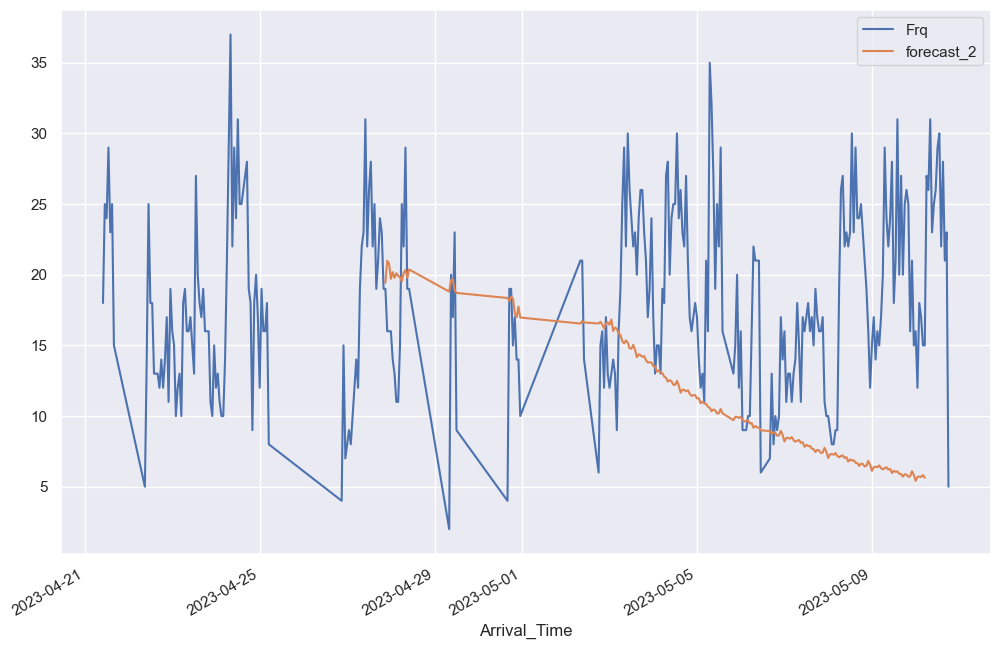

In [73]:
model=sm.tsa.statespace.SARIMAX(df_red['Frq'],order=(1, 0, 3),seasonal_order=(1,0,3,24))
results=model.fit()
df_red['forecast_2']=results.predict(start=100,end=300,dynamic=True)
df_red[['Frq','forecast_2']].plot(figsize=(12,8))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91283D+00    |proj g|=  6.50292D-02


 This problem is unconstrained.



At iterate    5    f=  2.84057D+00    |proj g|=  2.98035D-02

At iterate   10    f=  2.83508D+00    |proj g|=  5.81995D-03

At iterate   15    f=  2.83461D+00    |proj g|=  1.80391D-03

At iterate   20    f=  2.83445D+00    |proj g|=  1.58185D-03

At iterate   25    f=  2.83441D+00    |proj g|=  1.06470D-03

At iterate   30    f=  2.83439D+00    |proj g|=  1.97052D-04

At iterate   35    f=  2.83439D+00    |proj g|=  7.75768D-05

At iterate   40    f=  2.83439D+00    |proj g|=  3.15463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     52      1     0     0   4.562D-05   2.834D+00
  F =   2.83439275943

<Axes: xlabel='Arrival_Time'>

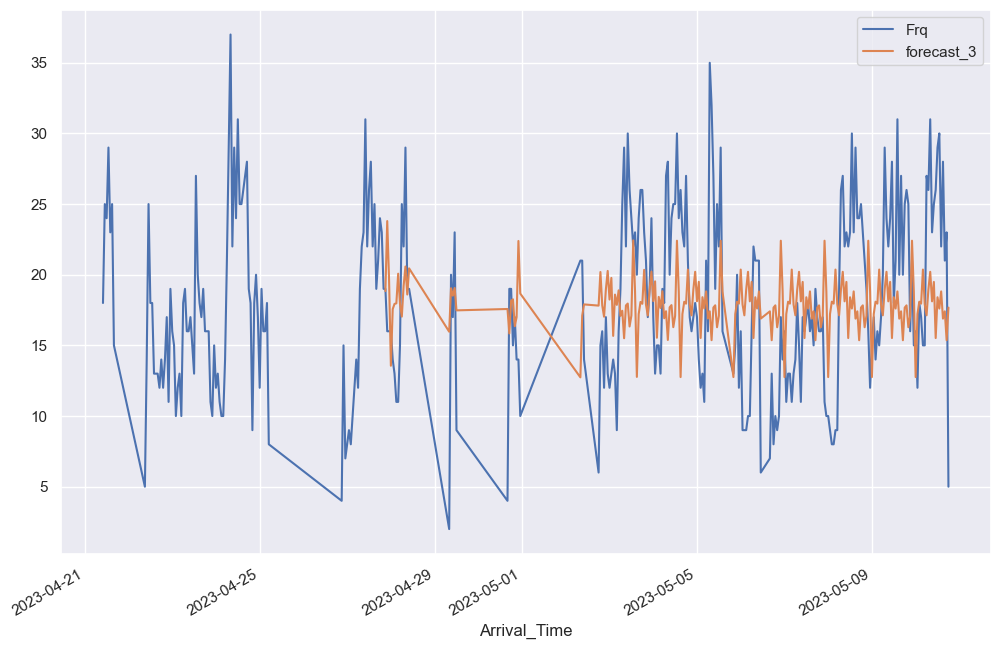

In [112]:
model=sm.tsa.statespace.SARIMAX(df_red['Frq'],order=(2, 0, 1),seasonal_order=(2,1,1,24))
results=model.fit()
df_red['forecast_3']=results.predict(start=250,end=313,dynamic=True)
df_red[['Frq','forecast_3']].plot(figsize=(12,8))

In [113]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_red.index[-1]+ DateOffset(hours=x)for x in range(0,48)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_red.columns)
future_datest_df.tail()

Frq First Difference Seasonal First Difference forecast  \
2023-05-12 13:00:00  NaN              NaN                       NaN      NaN   
2023-05-12 14:00:00  NaN              NaN                       NaN      NaN   
2023-05-12 15:00:00  NaN              NaN                       NaN      NaN   
2023-05-12 16:00:00  NaN              NaN                       NaN      NaN   
2023-05-12 17:00:00  NaN              NaN                       NaN      NaN   

                    forecast_manual forecast_auto forecast_1 forecast_2  \
2023-05-12 13:00:00             NaN           NaN        NaN        NaN   
2023-05-12 14:00:00             NaN           NaN        NaN        NaN   
2023-05-12 15:00:00             NaN           NaN        NaN        NaN   
2023-05-12 16:00:00             NaN           NaN        NaN        NaN   
2023-05-12 17:00:00             NaN           NaN        NaN        NaN   

                    forecast_3  
2023-05-12 13:00:00        NaN  
2023-05-12 14:00:00        NaN  
2023-05-12 15:00:00        NaN  
2023-05-12 16:00:00        NaN  
2023-05-12 17:00:00        NaN

In [125]:
future_df=pd.concat([df_red,future_datest_df])

#future_df['forecast_4'] = results.predict(start = 314, end = 320, dynamic= True)
#future_df[['Frq', 'forecast_4']].plot(figsize=(12, 8))
#future_df
future_df['forecast_4'] = results.predict(start = pd.to_datetime('2023-05-10 16:00:00'), end = pd.to_datetime('2023-05-12 17:00:00'), dynamic= True)
future_df['forecast_4'].tail(50)

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [109]:
future_df.iloc[314]

Frq                          NaN
First Difference             NaN
Seasonal First Difference    NaN
forecast                     NaN
forecast_manual              NaN
forecast_auto                NaN
forecast_1                   NaN
forecast_2                   NaN
forecast_3                   NaN
forecast_4                   NaN
Name: 2023-05-10 19:00:00, dtype: object

In [56]:
# split into train and test sets
X = df_red.Frq
size = int(len(X) * 0.66)
df_train, df_test = X[0:size], X[size:len(X)]

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


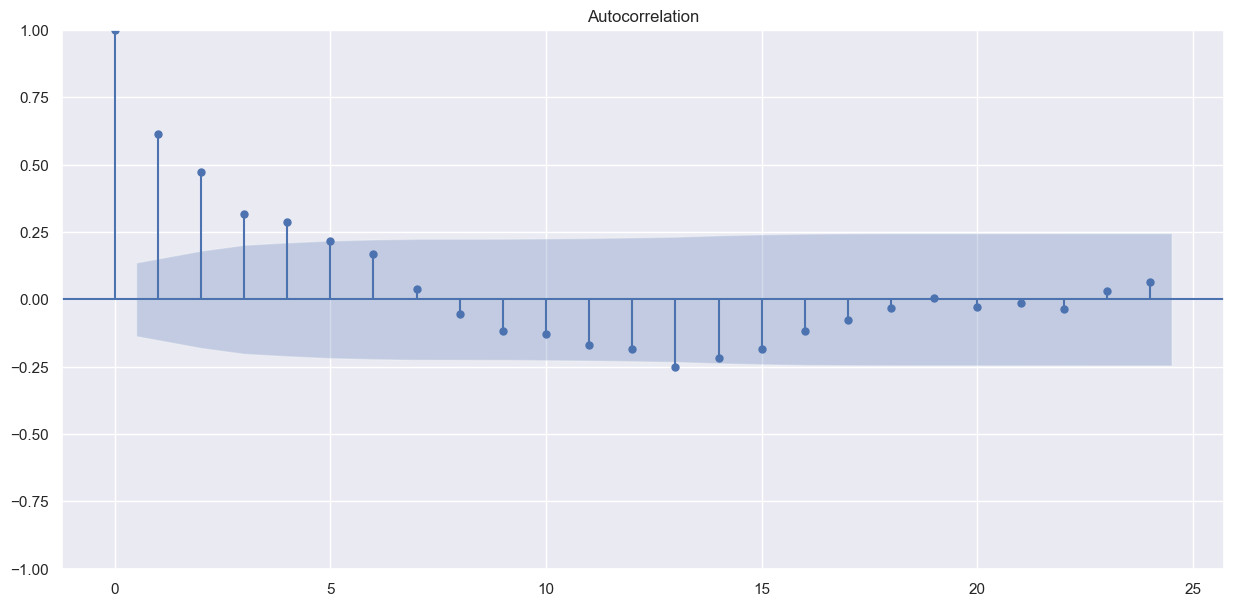

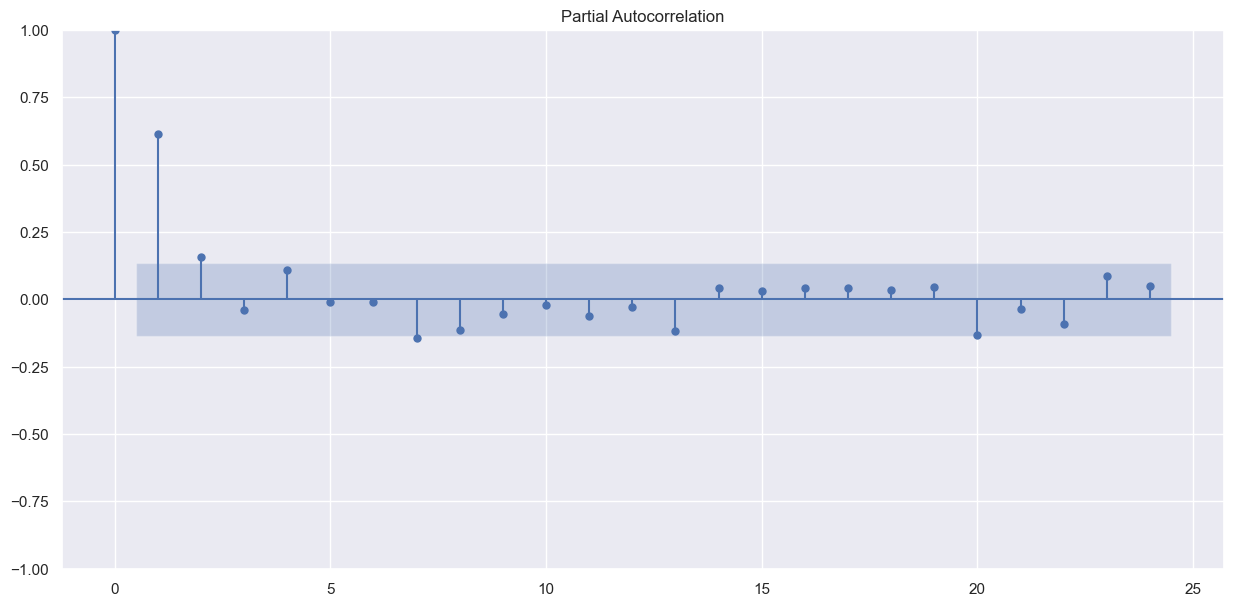

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [58]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')
#low p-value. likely stationary

p-value: 8.424491302323007e-06


<Axes: xlabel='Arrival_Time'>

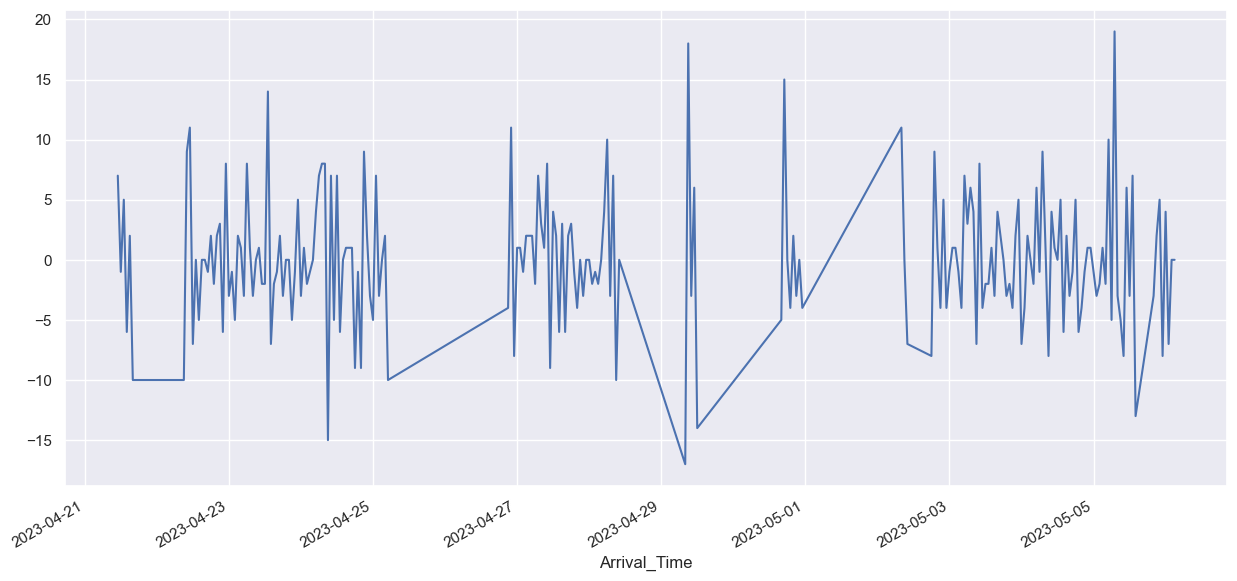

In [59]:
#differencing
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


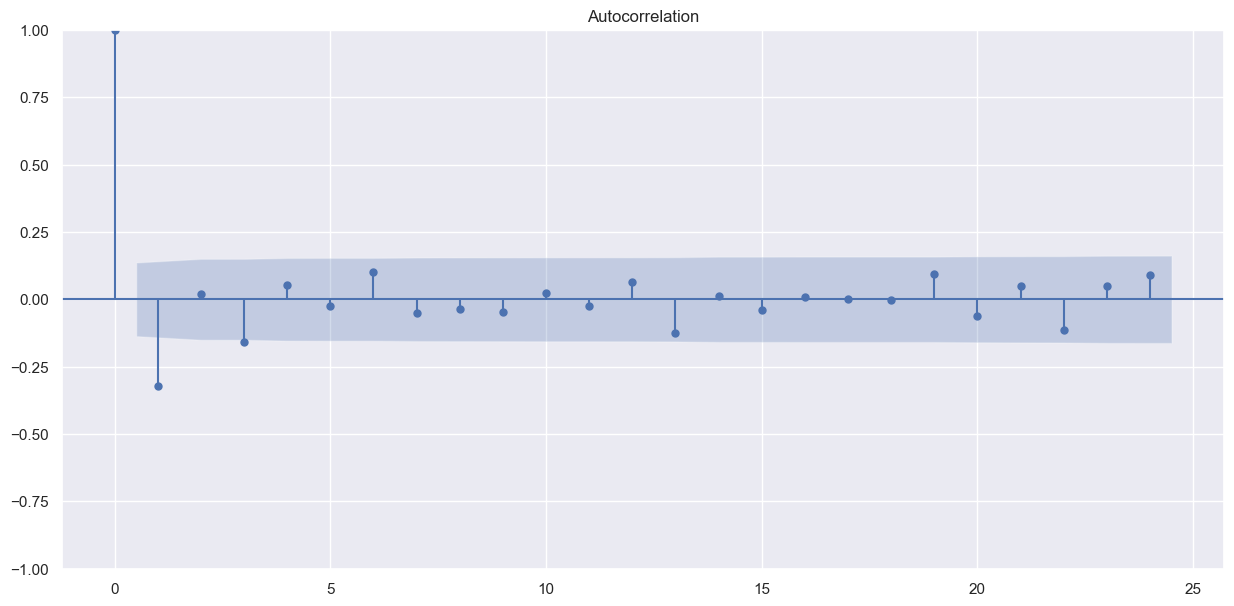

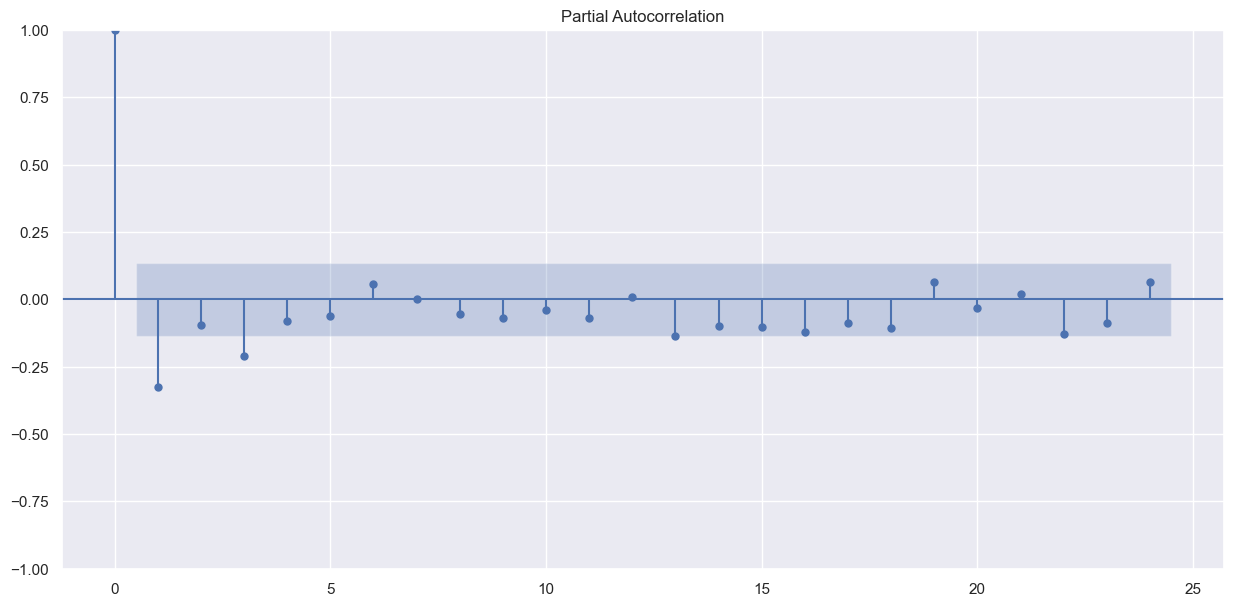

In [60]:
#acf and pacf plots on differenced series
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [61]:
#run adf test again
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.4003542794554774e-21


In [62]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Frq   No. Observations:                  207
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -633.669
Date:                Sun, 14 May 2023   AIC                           1273.339
Time:                        18:18:43   BIC                           1283.322
Sample:                             0   HQIC                          1277.377
                                - 207                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3543      0.058     -6.059      0.000      -0.469      -0.240
ar.L2         -0.0941      0.059     -1.586      0.113      -0.210       0.022
sigma2        27.4847      2.321     11.840      0.0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


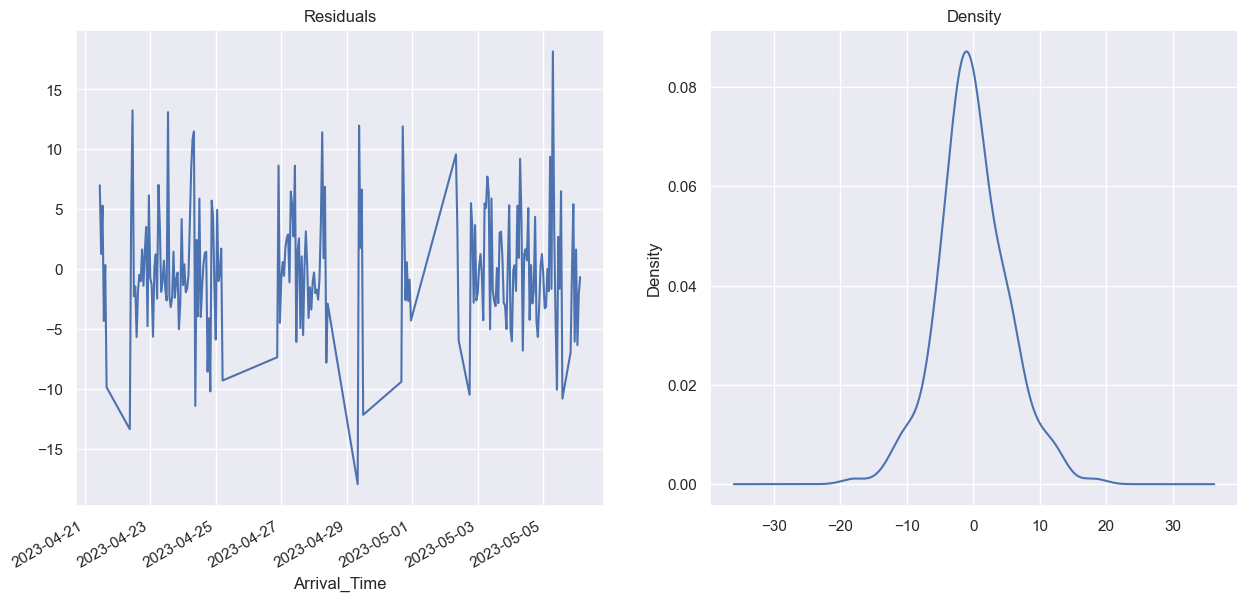

In [63]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


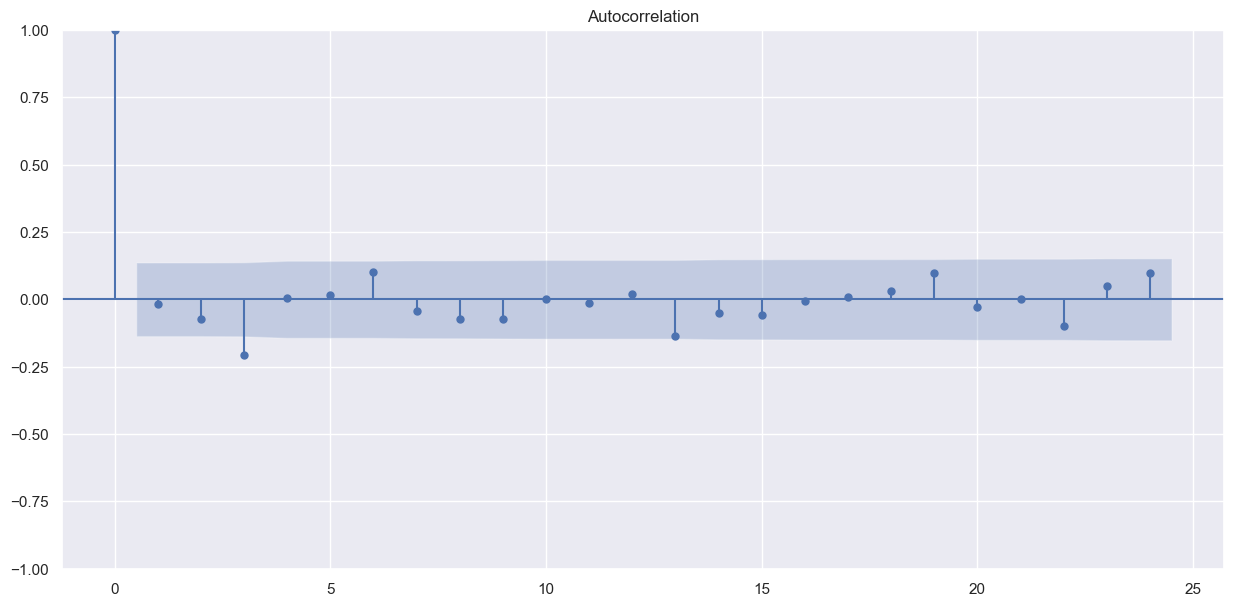

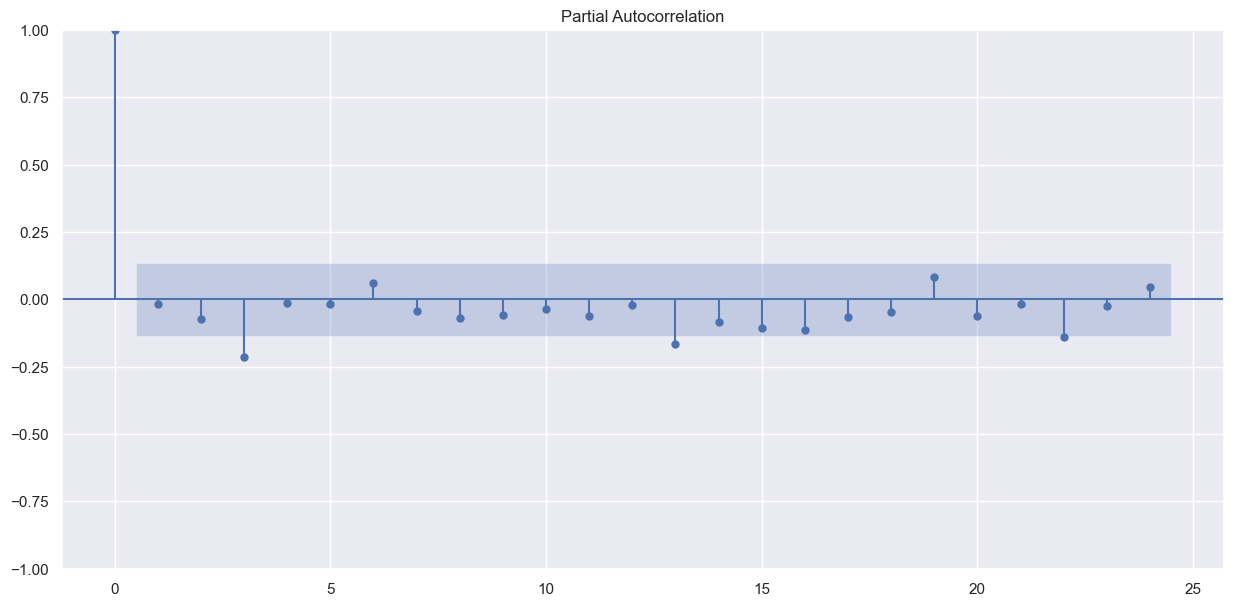

In [64]:

acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Arrival_Time'>

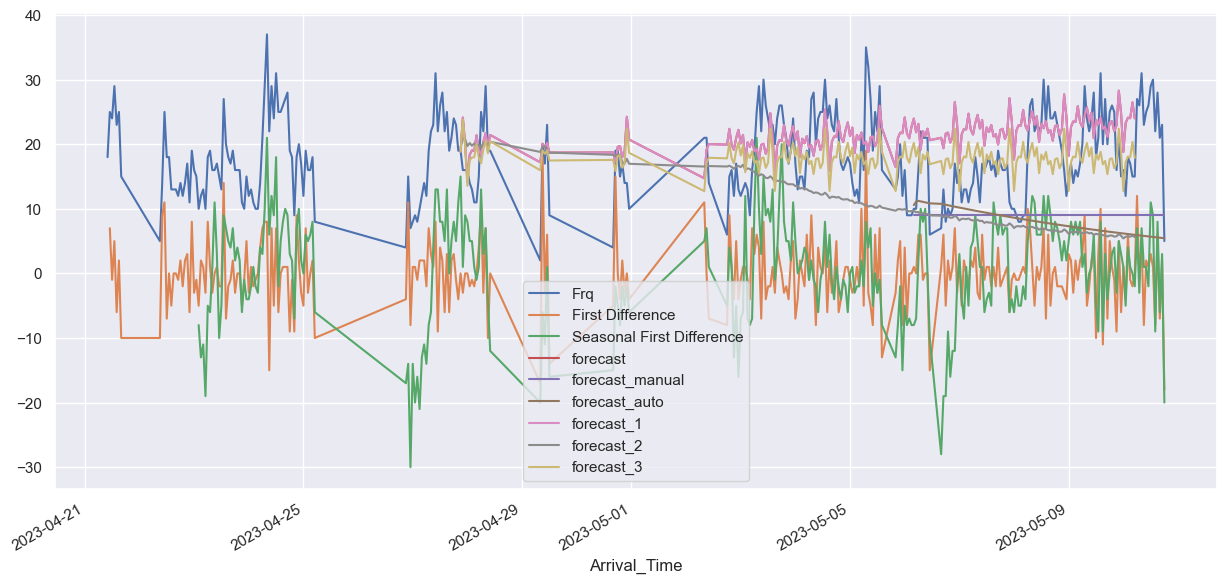

In [77]:
forecast_test = model_fit.forecast(len(df_test))

df_red['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df_red.plot()

In [67]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [68]:
auto_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  207
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -632.413
Date:                Sun, 14 May 2023   AIC                           1274.825
Time:                        18:20:39   BIC                           1291.489
Sample:                             0   HQIC                          1281.564
                                - 207                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9931      0.009    116.447      0.000       0.976       1.010
ma.L1         -0.3924      0.061     -6.406      0.000      -0.512      -0.272
ma.L2         -0.0427      0.075     -0.571      0.568      -0.189       0.104
ma.L3         -0.1524      0.077     -1.990      0.047      -0.303      -0.002
sigma2        26.0116      2.390     10.881      0.000      21.326      30.697
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.69
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               0.92   Skew:                             0.29
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Arrival_Time'>

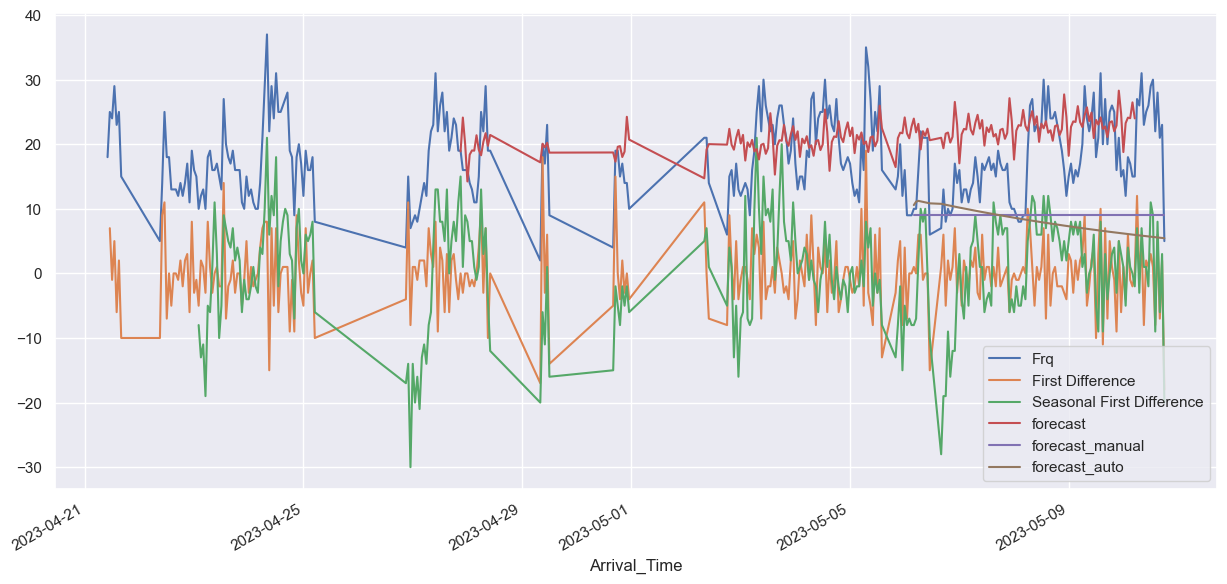

In [69]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df_red['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df_red.plot()

# GTFS

In [117]:
#load GTFS data from local .txt
gtfs_trips = pd.read_csv(r'trips.csv', low_memory=False)
gtfs_stoptimes = pd.read_csv(r'stop_times_subset.csv', low_memory=False)

In [118]:
gtfs_cal = pd.read_csv(r'calendar.txt',low_memory=False)

In [281]:
#check dataframe
gtfs_trips

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
0        Blue      106209  62188839203             1  62017884610  306200001   
1        Blue      106209  62188839205             1  62017884615  306200001   
2        Blue      106209  62188839208             1  62017884613  306200001   
3        Blue      106209  62188839242             1  62017884615  306200053   
4        Blue      106209  62188839245             1  62017884619  306200001   
...       ...         ...          ...           ...          ...        ...   
4426        Y      106201  62188759056             0  62017878281  306200033   
4427        Y      106201  62188759057             0  62017878281  306200033   
4428        Y      106201  62188759058             0  62017878281  306200033   
4429        Y      106201  62188759059             0  62017878281  306200033   
4430        Y      106201  62188759060             0  62017878281  306200033   

     direction  wheelchair_accessible schd_trip_id  
0        North                      1         R201  
1        North                      1         R228  
2        North                      1         R230  
3        North                      1         R214  
4        North                      1         R119  
...        ...                    ...          ...  
4426         0                      1         R596  
4427         0                      1         R595  
4428         0                      1         R595  
4429         0                      1         R595  
4430         0                      1         R595  

[4431 rows x 9 columns]

In [282]:
#check dataframe
gtfs_stoptimes

trip_id arrival_time departure_time  stop_id  stop_sequence  \
0     62188758942     19:40:30       19:40:30    30164              8   
1     62188758943      0:38:30        0:38:30    30164              8   
2     62188758944     10:30:30       10:30:30    30164              8   
3     62188758945     20:04:30       20:04:30    30164              8   
4     62188758946     20:16:30       20:16:30    30164              8   
...           ...          ...            ...      ...            ...   
4231  62189360559      7:29:30        7:29:30    30199             11   
4232  62189360688     16:00:00       16:00:00    30199             11   
4233  62189360690     17:18:00       17:18:00    30199             11   
4234  62189360692     18:30:00       18:30:00    30199             11   
4235  62189360694     19:45:00       19:45:00    30199             11   

     stop_headsign  pickup_type  shape_dist_traveled  
0           Howard            0                17149  
1           Howard            0                17149  
2           Howard            0                17149  
3           Howard            0                17149  
4           Howard            0                17149  
...            ...          ...                  ...  
4231          Loop            0                30187  
4232          Loop            0                30187  
4233          Loop            0                30187  
4234          Loop            0                30187  
4235          Loop            0                30187  

[4236 rows x 8 columns]

In [283]:
#check df
gtfs_cal

service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
0        63501       1        1          1         1       1         0   
1        63502       1        1          1         1       0         0   
2        63503       0        1          1         1       1         0   
3        63504       0        1          1         1       1         0   
4        63505       0        0          0         0       1         0   
..         ...     ...      ...        ...       ...     ...       ...   
123     106240       1        1          1         1       0         0   
124     106241       0        1          1         0       1         0   
125     106242       0        1          1         0       1         0   
126     206201       1        1          1         1       1         0   
127    BLS-101       1        1          1         1       1         1   

     sunday  start_date  end_date  
0         0    20201210  20201219  
1         0    20201210  20201219  
2         0    20201210  20201219  
3         0    20201210  20201219  
4         0    20201210  20201219  
..      ...         ...       ...  
123       1    20201210  20210228  
124       0    20201210  20210228  
125       0    20201210  20210228  
126       0    20201210  20210228  
127       1    20201210  20210228  

[128 rows x 10 columns]

### GTFS

In [55]:
gtfs_trips = pd.DataFrame(gtfs_trips)
gtfs_stoptimes = pd.DataFrame(gtfs_stoptimes)

In [56]:
gtfs_trips.shape

(4431, 9)

In [57]:
gtfs_stoptimes.shape

(4236, 8)

In [58]:
gtfs_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   route_id               4431 non-null   object
 1   service_id             4431 non-null   int64 
 2   trip_id                4431 non-null   int64 
 3   direction_id           4431 non-null   int64 
 4   block_id               4431 non-null   int64 
 5   shape_id               4431 non-null   int64 
 6   direction              4431 non-null   object
 7   wheelchair_accessible  4431 non-null   int64 
 8   schd_trip_id           4431 non-null   object
dtypes: int64(6), object(3)
memory usage: 311.7+ KB


In [59]:
gtfs_stoptimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trip_id              4236 non-null   int64 
 1   arrival_time         4236 non-null   object
 2   departure_time       4236 non-null   object
 3   stop_id              4236 non-null   int64 
 4   stop_sequence        4236 non-null   int64 
 5   stop_headsign        4236 non-null   object
 6   pickup_type          4236 non-null   int64 
 7   shape_dist_traveled  4236 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 264.9+ KB


In [60]:
gtfs_trips.head()

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
0     Blue      106209  62188839203             1  62017884610  306200001   
1     Blue      106209  62188839205             1  62017884615  306200001   
2     Blue      106209  62188839208             1  62017884613  306200001   
3     Blue      106209  62188839242             1  62017884615  306200053   
4     Blue      106209  62188839245             1  62017884619  306200001   

  direction  wheelchair_accessible schd_trip_id  
0     North                      1         R201  
1     North                      1         R228  
2     North                      1         R230  
3     North                      1         R214  
4     North                      1         R119

In [61]:
gtfs_stoptimes.head()

trip_id arrival_time departure_time  stop_id  stop_sequence  \
0  62188758942     19:40:30       19:40:30    30164              8   
1  62188758943      0:38:30        0:38:30    30164              8   
2  62188758944     10:30:30       10:30:30    30164              8   
3  62188758945     20:04:30       20:04:30    30164              8   
4  62188758946     20:16:30       20:16:30    30164              8   

  stop_headsign  pickup_type  shape_dist_traveled  
0        Howard            0                17149  
1        Howard            0                17149  
2        Howard            0                17149  
3        Howard            0                17149  
4        Howard            0                17149

In [62]:
#remove all "R"s in front of trip_id so we can merge with arrival times data
gtfs_trips["schd_trip_id"] = gtfs_trips["schd_trip_id"].str.replace("R","",1)
#check
gtfs_trips.head()

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
0     Blue      106209  62188839203             1  62017884610  306200001   
1     Blue      106209  62188839205             1  62017884615  306200001   
2     Blue      106209  62188839208             1  62017884613  306200001   
3     Blue      106209  62188839242             1  62017884615  306200053   
4     Blue      106209  62188839245             1  62017884619  306200001   

  direction  wheelchair_accessible schd_trip_id  
0     North                      1          201  
1     North                      1          228  
2     North                      1          230  
3     North                      1          214  
4     North                      1          119

In [68]:
#check that trip_ids can be used to concat dfs
gtfs_trips.loc[gtfs_trips.trip_id==62188839242]

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
3     Blue      106209  62188839242             1  62017884615  306200053   

  direction  wheelchair_accessible schd_trip_id  
3     North                      1          214

In [69]:
#check that trip_ids can be used to concat dfs
gtfs_stoptimes.loc[gtfs_stoptimes.trip_id==62188839242]

trip_id arrival_time departure_time  stop_id  stop_sequence  \
2701  62188839242     18:27:00       18:27:00    30197             14   

     stop_headsign  pickup_type  shape_dist_traveled  
2701        O'Hare            0                36656

In [70]:
#merge
gtfs_comb = gtfs_trips.merge(gtfs_stoptimes)

In [71]:
#check merge
gtfs_comb.head()

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
0     Blue      106209  62188839203             1  62017884610  306200001   
1     Blue      106209  62188839205             1  62017884615  306200001   
2     Blue      106209  62188839208             1  62017884613  306200001   
3     Blue      106209  62188839242             1  62017884615  306200053   
4     Blue      106209  62188839245             1  62017884619  306200001   

  direction  wheelchair_accessible schd_trip_id arrival_time departure_time  \
0     North                      1          201      4:03:30        4:03:30   
1     North                      1          228      3:48:30        3:48:30   
2     North                      1          230      4:48:30        4:48:30   
3     North                      1          214     18:27:00       18:27:00   
4     North                      1          119     17:19:30       17:19:30   

   stop_id  stop_sequence stop_headsign  pickup_type  shape_dist_traveled  
0    30197             24        O'Hare            0                82780  
1    30197             24        O'Hare            0                82780  
2    30197             24        O'Hare            0                82780  
3    30197             14        O'Hare            0                36656  
4    30197             24        O'Hare            0                82780

In [72]:
gtfs_comb.shape

(4236, 16)

In [74]:
#check datatypes
gtfs_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 0 to 4235
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   route_id               4236 non-null   object
 1   service_id             4236 non-null   int64 
 2   trip_id                4236 non-null   int64 
 3   direction_id           4236 non-null   int64 
 4   block_id               4236 non-null   int64 
 5   shape_id               4236 non-null   int64 
 6   direction              4236 non-null   object
 7   wheelchair_accessible  4236 non-null   int64 
 8   schd_trip_id           4236 non-null   object
 9   arrival_time           4236 non-null   object
 10  departure_time         4236 non-null   object
 11  stop_id                4236 non-null   int64 
 12  stop_sequence          4236 non-null   int64 
 13  stop_headsign          4236 non-null   object
 14  pickup_type            4236 non-null   int64 
 15  shape_dist_traveled  

In [86]:
gtfs_cal.head()

service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0      63501       1        1          1         1       1         0       0   
1      63502       1        1          1         1       0         0       0   
2      63503       0        1          1         1       1         0       0   
3      63504       0        1          1         1       1         0       0   
4      63505       0        0          0         0       1         0       0   

   start_date  end_date  
0    20201210  20201219  
1    20201210  20201219  
2    20201210  20201219  
3    20201210  20201219  
4    20201210  20201219

In [89]:
#check datatypes
gtfs_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   service_id  128 non-null    object
 1   monday      128 non-null    int64 
 2   tuesday     128 non-null    int64 
 3   wednesday   128 non-null    int64 
 4   thursday    128 non-null    int64 
 5   friday      128 non-null    int64 
 6   saturday    128 non-null    int64 
 7   sunday      128 non-null    int64 
 8   start_date  128 non-null    int64 
 9   end_date    128 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.1+ KB


In [94]:
#find the row preventing this column from being int
gtfs_cal.loc[gtfs_cal['service_id']=='BLS-101']

service_id  monday  tuesday  wednesday  thursday  friday  saturday  \
127    BLS-101       1        1          1         1       1         1   

     sunday  start_date  end_date  
127       1    20201210  20210228

In [99]:
#drop row
gtfs_cal = gtfs_cal[gtfs_cal.service_id != 'BLS-101']

In [100]:
#convert service_id from obj to int datatype
gtfs_cal['service_id'] = gtfs_cal['service_id'].astype(str).astype(int)

<ipython-input-100-4c4ef0bbf581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtfs_cal['service_id'] = gtfs_cal['service_id'].astype(str).astype(int)


In [101]:
#check datatypes
gtfs_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   service_id  127 non-null    int64
 1   monday      127 non-null    int64
 2   tuesday     127 non-null    int64
 3   wednesday   127 non-null    int64
 4   thursday    127 non-null    int64
 5   friday      127 non-null    int64
 6   saturday    127 non-null    int64
 7   sunday      127 non-null    int64
 8   start_date  127 non-null    int64
 9   end_date    127 non-null    int64
dtypes: int64(10)
memory usage: 10.9 KB


In [102]:
#merge on service_id
gtfs_comb = gtfs_comb.merge(gtfs_cal)

In [103]:
#check merge
gtfs_comb.head()

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
0     Blue      106209  62188839203             1  62017884610  306200001   
1     Blue      106209  62188839205             1  62017884615  306200001   
2     Blue      106209  62188839208             1  62017884613  306200001   
3     Blue      106209  62188839242             1  62017884615  306200053   
4     Blue      106209  62188839245             1  62017884619  306200001   

  direction  wheelchair_accessible schd_trip_id arrival_time  ...  \
0     North                      1          201      4:03:30  ...   
1     North                      1          228      3:48:30  ...   
2     North                      1          230      4:48:30  ...   
3     North                      1          214     18:27:00  ...   
4     North                      1          119     17:19:30  ...   

  shape_dist_traveled  monday  tuesday wednesday  thursday  friday  saturday  \
0               82780       0        0         0         0       0         0   
1               82780       0        0         0         0       0         0   
2               82780       0        0         0         0       0         0   
3               36656       0        0         0         0       0         0   
4               82780       0        0         0         0       0         0   

   sunday  start_date  end_date  
0       1    20201210  20210228  
1       1    20201210  20210228  
2       1    20201210  20210228  
3       1    20201210  20210228  
4       1    20201210  20210228  

[5 rows x 25 columns]

In [104]:
#drop columns we don't need
gtfs_comb = gtfs_comb[["route_id", "service_id","trip_id","direction_id","direction","schd_trip_id","arrival_time","departure_time","stop_id","stop_headsign","monday","tuesday","wednesday","thursday","friday","saturday","sunday"]]

In [106]:
#check
gtfs_comb

route_id  service_id      trip_id  direction_id direction schd_trip_id  \
0        Blue      106209  62188839203             1     North          201   
1        Blue      106209  62188839205             1     North          228   
2        Blue      106209  62188839208             1     North          230   
3        Blue      106209  62188839242             1     North          214   
4        Blue      106209  62188839245             1     North          119   
...       ...         ...          ...           ...       ...          ...   
4231        P      206201  62188759015             1         0          504   
4232        P      206201  62188759022             1         0          515   
4233        P      206201  62188759024             1         0          509   
4234        P      206201  62188759026             1         0          519   
4235        P      206201  62188759130             1         0          507   

     arrival_time departure_time  stop_id stop_headsign  monday  tuesday  \
0         4:03:30        4:03:30    30197        O'Hare       0        0   
1         3:48:30        3:48:30    30197        O'Hare       0        0   
2         4:48:30        4:48:30    30197        O'Hare       0        0   
3        18:27:00       18:27:00    30197        O'Hare       0        0   
4        17:19:30       17:19:30    30197        O'Hare       0        0   
...           ...            ...      ...           ...     ...      ...   
4231     17:56:30       17:56:30    30164          Loop       1        1   
4232     16:07:30       16:07:30    30164          Loop       1        1   
4233     16:26:30       16:26:30    30164          Loop       1        1   
4234     16:30:30       16:30:30    30164          Loop       1        1   
4235     16:12:30       16:12:30    30164          Loop       1        1   

      wednesday  thursday  friday  saturday  sunday  
0             0         0       0         0       1  
1             0         0       0         0       1  
2             0         0       0         0       1  
3             0         0       0         0       1  
4             0         0       0         0       1  
...         ...       ...     ...       ...     ...  
4231          1         1       1         0       0  
4232          1         1       1         0       0  
4233          1         1       1         0       0  
4234          1         1       1         0       0  
4235          1         1       1         0       0  

[4236 rows x 17 columns]

In [113]:
gtfs_comb['arrival_time'] = pd.to_datetime(gtfs_comb['arrival_time'],format= '%HH:%MM:%SS')
gtfs_comb.head()

ValueError: time data '4:03:30' does not match format '%HH:%MM:%SS' (match)

In [111]:
gtfs_comb.arrival_time.value_counts()

22:17:00    10
20:17:00     9
21:17:00     9
22:32:00     8
21:32:00     8
            ..
15:00:00     1
15:30:00     1
8:39:30      1
9:24:30      1
16:12:30     1
Name: arrival_time, Length: 1799, dtype: int64

# Merge Actual and Predicted Arrival Times

In [75]:
gtfs_comb.head()

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
0     Blue      106209  62188839203             1  62017884610  306200001   
1     Blue      106209  62188839205             1  62017884615  306200001   
2     Blue      106209  62188839208             1  62017884613  306200001   
3     Blue      106209  62188839242             1  62017884615  306200053   
4     Blue      106209  62188839245             1  62017884619  306200001   

  direction  wheelchair_accessible schd_trip_id arrival_time departure_time  \
0     North                      1          201      4:03:30        4:03:30   
1     North                      1          228      3:48:30        3:48:30   
2     North                      1          230      4:48:30        4:48:30   
3     North                      1          214     18:27:00       18:27:00   
4     North                      1          119     17:19:30       17:19:30   

   stop_id  stop_sequence stop_headsign  pickup_type  shape_dist_traveled  
0    30197             24        O'Hare            0                82780  
1    30197             24        O'Hare            0                82780  
2    30197             24        O'Hare            0                82780  
3    30197             14        O'Hare            0                36656  
4    30197             24        O'Hare            0                82780

In [76]:
df_clean.head()

Station_ID  Stop_ID     Station_Name    Destination Route  Run_Number  \
0       40330    30065            Grand  95th/Dan Ryan   Red         809   
1       40330    30065            Grand  95th/Dan Ryan   Red         809   
3       41360    30265       California   Ashland/63rd     G           2   
4       40840    30164  South Boulevard           Loop     P         506   
5       41130    30215          Halsted           Loop   Org         706   

      Prediction_Time        Arrival_Time  Is_Approaching  Is_Scheduled  \
0 2023-04-21 10:25:05 2023-04-21 10:26:05               1             0   
1 2023-04-21 10:25:57 2023-04-21 10:26:57               1             0   
3 2023-04-21 10:26:34 2023-04-21 10:27:34               1             0   
4 2023-04-21 10:26:26 2023-04-21 10:27:26               1             0   
5 2023-04-21 10:26:57 2023-04-21 10:27:57               1             0   

   Is_Delayed  Is_Fault  
0           0         0  
1           0         0  
3           0         0  
4           0         0  
5           0         0

In [78]:
#checking how we might merge these two dfs
gtfs_comb.loc[gtfs_comb['schd_trip_id']=='119']

route_id  service_id      trip_id  direction_id     block_id   shape_id  \
4       Blue      106209  62188839245             1  62017884619  306200001   
61      Blue      106209  62188839130             1  62017884623  306200053   
108     Blue      106209  62188839177             1  62017884624  306200001   
124     Blue      106206  62188840450             1  62017884733  306200001   
234     Blue      106206  62188840417             1  62017884736  306200053   
295     Blue      106206  62188840286             1  62017884724  306200001   
411     Blue      106201  62189360251             1  62017931165  306200001   
425     Blue      106201  62189360022             1  62017931145  306200001   
467     Blue      106201  62189360105             1  62017931141  306200001   
538     Blue      106209  62188839274             0  62017884609  306200002   
569     Blue      106209  62188839020             0  62017884619  306200002   
683     Blue      106209  62188839006             0  62017884623  306200074   
726     Blue      106206  62188840377             0  62017884733  306200002   
778     Blue      106206  62188840147             0  62017884724  306200002   
801     Blue      106206  62188840170             0  62017884736  306200074   
933     Blue      106201  62189360037             0  62017931158  306200002   

    direction  wheelchair_accessible schd_trip_id arrival_time departure_time  \
4       North                      1          119     17:19:30       17:19:30   
61      North                      1          119     14:01:30       14:01:30   
108     North                      1          119     21:18:30       21:18:30   
124     North                      1          119     14:19:30       14:19:30   
234     North                      1          119     20:13:30       20:13:30   
295     North                      1          119     18:07:30       18:07:30   
411     North                      1          119     14:34:30       14:34:30   
425     North                      1          119     17:31:00       17:31:00   
467     North                      1          119     10:13:30       10:13:30   
538     South                      1          119     19:15:00       19:15:00   
569     South                      1          119     15:25:00       15:25:00   
683     South                      1          119     13:07:00       13:07:00   
726     South                      1          119     12:25:00       12:25:00   
778     South                      1          119     16:13:00       16:13:00   
801     South                      1          119     19:19:00       19:19:00   
933     South                      1          119      8:18:00        8:18:00   

     stop_id  stop_sequence stop_headsign  pickup_type  shape_dist_traveled  
4      30197             24        O'Hare            0                82780  
61     30197             14        O'Hare            0                36656  
108    30197             24        O'Hare            0                82780  
124    30197             24        O'Hare            0                82780  
234    30197             14        O'Hare            0                36656  
295    30197             24        O'Hare            0                82780  
411    30197             24        O'Hare            0                82780  
425    30197             24        O'Hare            0                82780  
467    30197             24        O'Hare            0                82780  
538    30198             10   Forest Park            0                64157  
569    30198             10   Forest Park            0                64157  
683    30198             10   UIC-Halsted            0                64157  
726    30198             10   Forest Park            0                64157  
778    30198             10   Forest Park            0                64157  
801    30198             10   UIC-Halsted            0                64157  
933    30198             10   Fore

In [81]:
#checking how we might merge these two dfs
df_clean.loc[df_clean['Run_Number']==119]

Station_ID  Stop_ID  Station_Name  Destination Route  Run_Number  \
411        41020    30198  Logan Square  UIC-Halsted  Blue         119   
412        41020    30198  Logan Square  UIC-Halsted  Blue         119   
413        41020    30198  Logan Square  UIC-Halsted  Blue         119   
564        41020    30197  Logan Square       O'Hare  Blue         119   
565        41020    30197  Logan Square       O'Hare  Blue         119   
793        41020    30198  Logan Square  UIC-Halsted  Blue         119   
796        41020    30198  Logan Square  UIC-Halsted  Blue         119   
799        41020    30198  Logan Square  UIC-Halsted  Blue         119   
804        41020    30198  Logan Square  UIC-Halsted  Blue         119   
1001       41020    30197  Logan Square       O'Hare  Blue         119   
1002       41020    30197  Logan Square       O'Hare  Blue         119   

         Prediction_Time        Arrival_Time  Is_Approaching  Is_Scheduled  \
411  2023-04-21 13:04:16 2023-04-21 13:05:16               1             0   
412  2023-04-21 13:04:56 2023-04-21 13:05:56               1             0   
413  2023-04-21 13:05:16 2023-04-21 13:06:16               1             0   
564  2023-04-21 14:02:16 2023-04-21 14:03:16               1             0   
565  2023-04-21 14:02:27 2023-04-21 14:03:27               1             0   
793  2023-04-21 15:27:53 2023-04-21 15:28:53               1             0   
796  2023-04-21 15:28:11 2023-04-21 15:29:11               1             0   
799  2023-04-21 15:28:58 2023-04-21 15:29:58               1             0   
804  2023-04-21 15:29:07 2023-04-21 15:30:07               1             0   
1001 2023-04-21 16:35:31 2023-04-21 16:36:31               1             0   
1002 2023-04-21 16:36:08 2023-04-21 16:37:08               1             0   

      Is_Delayed  Is_Fault  
411            0         0  
412            0         0  
413            0         0  
564            0         0  
565            0         0  
793            0         0  
796            0         0  
799            0         0  
804            0         0  
1001           0         0  
1002           0         0